#Cargar Datos

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import networkx as nx

# Cargar el archivo Excel en un DataFrame usando pandas
df = pd.read_excel("Nodes_Completition.xlsx")
df_nodes = pd.read_excel('Nodes.xlsx')
df_edges = pd.read_excel('links.xlsx')
# df_edges_k = pd.read_excel('links ruta K.xlsx')

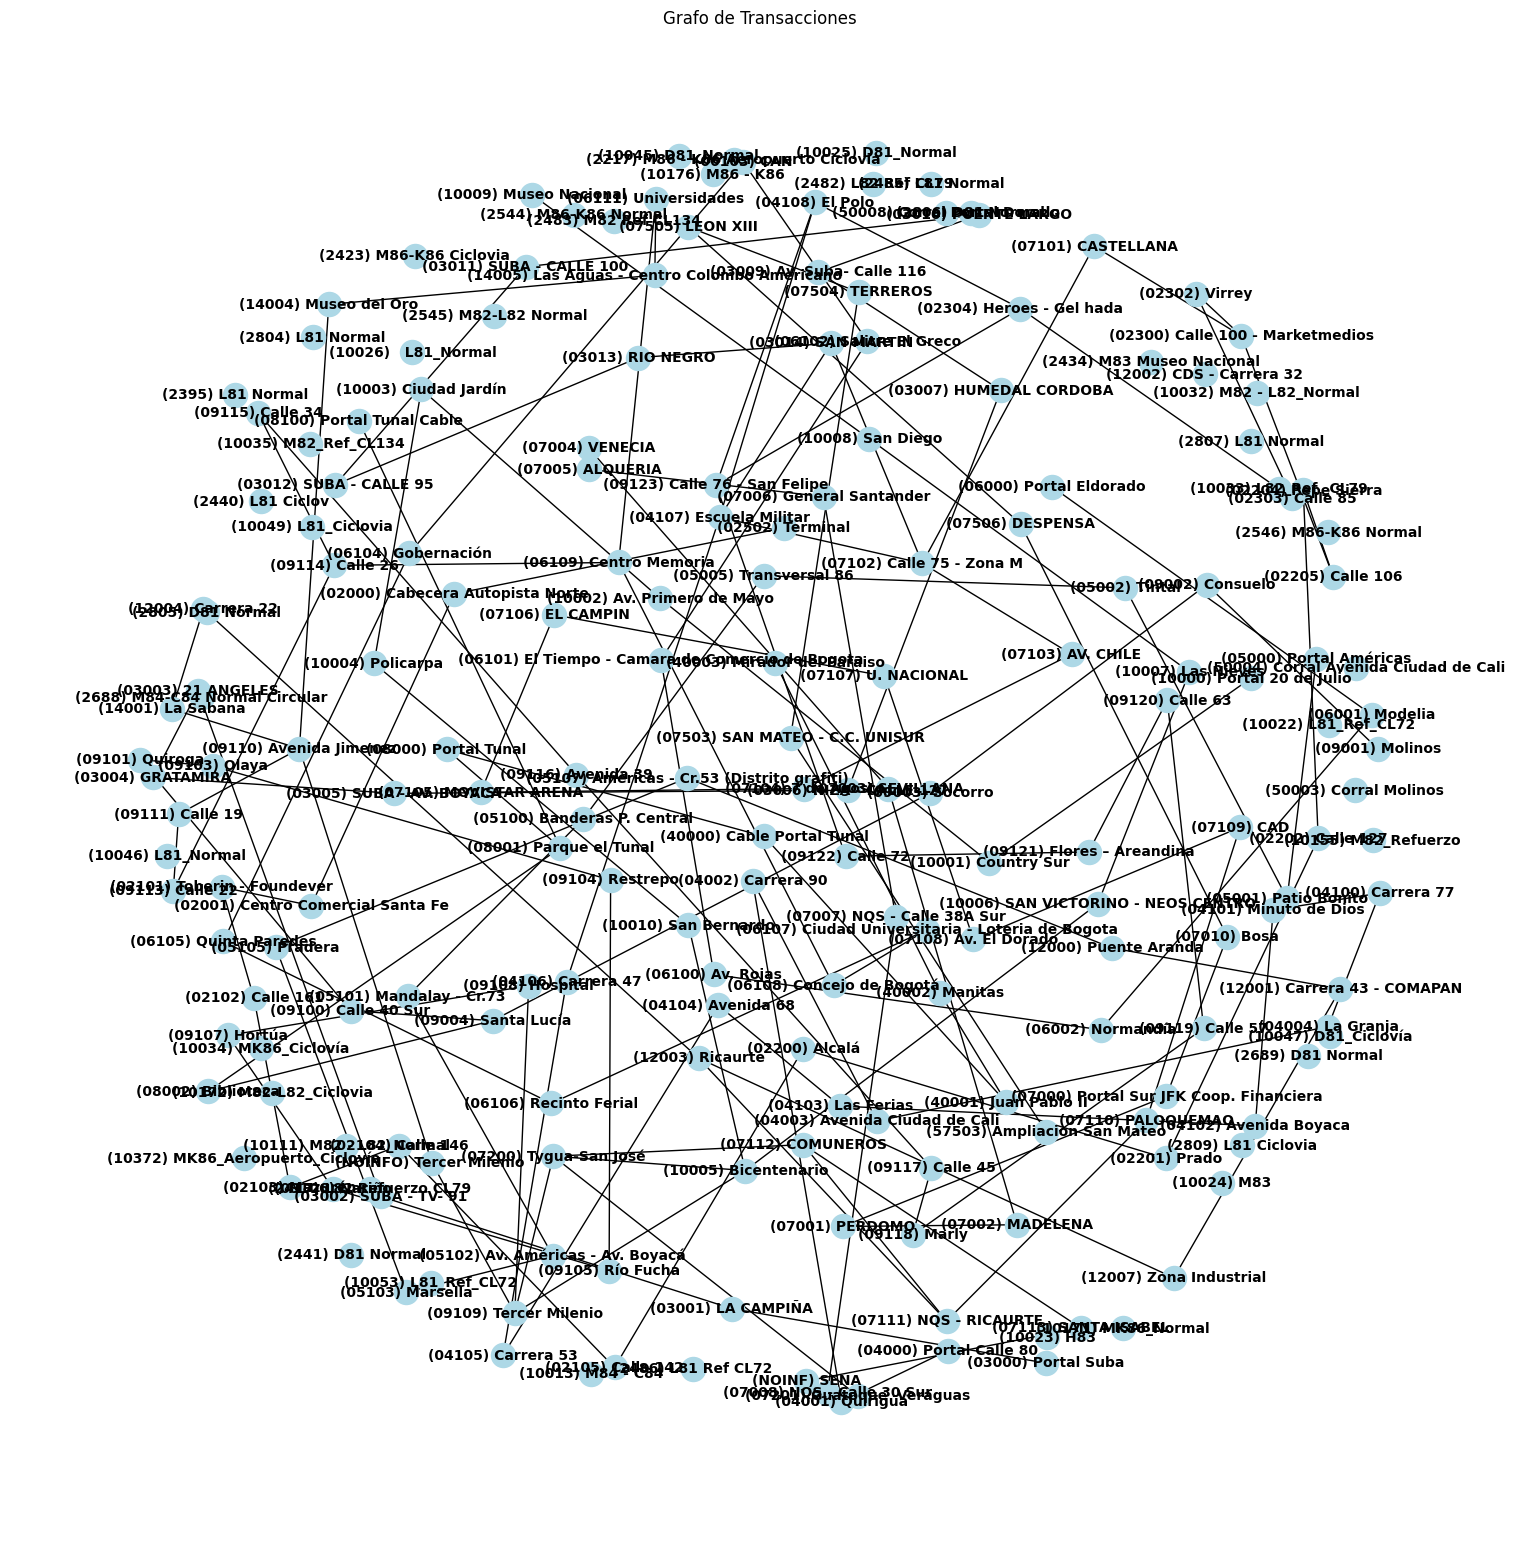

In [ ]:
# Crear un grafo no dirigido
G = nx.Graph()

# Agregar nodos al grafo
for index, row in df_nodes.iterrows():
    G.add_node(row['Id'], Label=str(row['Label']))

# Agregar aristas al grafo
for index, row in df_edges.iterrows():
    G.add_edge(row['Source'], row['Target'], Type=row['Type'], Label='')

# for index, row in df_edges_k.iterrows():
#     G.add_edge(row['Source'], row['Target'], Type=row['Type'], Label=row['Label 2'])

plt.figure(figsize=(15, 15))  # Reducir el tamaño de la figura
pos = nx.spring_layout(G, k=0.5)  # Utilizar una disposición shell
nx.draw(G, pos, labels={node: G.nodes[node]['Label'] for node in G.nodes()}, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)
edge_labels = {(source, target): attr['Label'] for source, target, attr in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title('Grafo de Transacciones')
plt.show()


##Eliminar Nodos Aislados

In [ ]:
# Obtener los nodos aislados antes de eliminarlos
isolates = list(nx.isolates(G))

# Imprimir cada nodo aislado que será removido
print("Nodos aislados a ser removidos:")
for node in isolates:
    label = G.nodes[node]['Label']
    print(f"Nodo {node}: {label}")

# Eliminar nodos aislados del grafo
G.remove_nodes_from(isolates)

# plt.figure(figsize=(15, 15))  # Reducir el tamaño de la figura
# pos = nx.spring_layout(G, k=0.5)  # Utilizar una disposición shell
# nx.draw(G, pos, labels={node: G.nodes[node]['Label'] for node in G.nodes()}, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)
# edge_labels = {(source, target): attr['Label'] for source, target, attr in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
# plt.title('Grafo de Transacciones')
# plt.show()

Nodos aislados a ser removidos:
Nodo 85: (12002) CDS - Carrera 32
Nodo 156: (10013) M84 - C84
Nodo 157: (10023) H83
Nodo 158: (10024) M83
Nodo 159: (10022) L81_Ref_CL72
Nodo 160: (10025) D81_Normal
Nodo 161: (10026)   L81_Normal
Nodo 162: (10034) MK86_Ciclovía
Nodo 163: (10171) MK86_Normal
Nodo 164: (10372) MK86_Aeropuerto_Ciclovía
Nodo 165: (10032) M82 - L82_Normal
Nodo 166: (10033) L82_Ref _CL79
Nodo 167: (10035) M82_Ref_CL134
Nodo 168: (10176) M86 - K86
Nodo 169: (10111) M82 - L82_Normal
Nodo 170: (10155) M82_Refuerzo
Nodo 171: (10172) M82-L82_Ciclovia
Nodo 172: (10045) D81_Normal
Nodo 173: (10046) L81_Normal
Nodo 174: (10047) D81_Ciclovía
Nodo 175: (10049) L81_Ciclovia
Nodo 176: (10053) L81_Ref_CL72
Nodo 177: (50008) Corral Portal Dorado
Nodo 178: (2688) M84-C84 Normal Circular
Nodo 179: (2217) M86 - K86 Aeropuerto Ciclovia
Nodo 180: (2423) M86-K86 Ciclovia
Nodo 181: (2546) M86-K86 Normal
Nodo 182: (2417) L82 Refuerzo CL79
Nodo 183: (2434) M83 Museo Nacional
Nodo 184: (50003) Corra

#Medidas Basicas de centralidad

##Grado de centralidad

In [ ]:
degree_centrality = nx.degree_centrality(G)
print("Grado de centralidad:")
for node, centrality in degree_centrality.items():
    label = G.nodes[node]['Label']
    print(f"{label}: {centrality}")


Grado de centralidad:
(03000) Portal Suba: 0.006535947712418301
(03001) LA CAMPIÑA: 0.013071895424836602
(03002) SUBA - TV- 91: 0.013071895424836602
(03003) 21 ANGELES: 0.013071895424836602
(03004) GRATAMIRA: 0.013071895424836602
(03005) SUBA - AV. BOYACA: 0.013071895424836602
(03006) NIZA - CALLE 127: 0.013071895424836602
(03007) HUMEDAL CORDOBA: 0.013071895424836602
(03009) Av. Suba- Calle 116: 0.013071895424836602
(03010) PUENTE LARGO: 0.013071895424836602
(03011) SUBA - CALLE 100: 0.013071895424836602
(03012) SUBA - CALLE 95: 0.013071895424836602
(03013) RIO NEGRO: 0.013071895424836602
(03014) SAN MARTIN: 0.0196078431372549
(02000) Cabecera Autopista Norte: 0.013071895424836602
(02001) Centro Comercial Santa Fe: 0.013071895424836602
(02101) Toberin - Foundever: 0.013071895424836602
(02102) Calle 161: 0.013071895424836602
(02103) Mazurén: 0.013071895424836602
(02104) Calle 146: 0.013071895424836602
(02105) Calle 142: 0.013071895424836602
(02200) Alcalá: 0.013071895424836602
(02201) 

##Centralidad de intermediación

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
print("\nCentralidad de intermediación:")
for node, centrality in betweenness_centrality.items():
    label = G.nodes[node]['Label']
    print(f"{label}: {centrality}")


Centralidad de intermediación:
(03000) Portal Suba: 0.0
(03001) LA CAMPIÑA: 0.013071895424836602
(03002) SUBA - TV- 91: 0.025971792225662194
(03003) 21 ANGELES: 0.038699690402476776
(03004) GRATAMIRA: 0.05125558995528036
(03005) SUBA - AV. BOYACA: 0.06363949088407292
(03006) NIZA - CALLE 127: 0.07585139318885449
(03007) HUMEDAL CORDOBA: 0.08789129686962505
(03009) Av. Suba- Calle 116: 0.09975920192638459
(03010) PUENTE LARGO: 0.11145510835913312
(03011) SUBA - CALLE 100: 0.12297901616787066
(03012) SUBA - CALLE 95: 0.13433092535259716
(03013) RIO NEGRO: 0.14551083591331268
(03014) SAN MARTIN: 0.1565187478500172
(02000) Cabecera Autopista Norte: 0.013071895424836602
(02001) Centro Comercial Santa Fe: 0.025971792225662194
(02101) Toberin - Foundever: 0.038699690402476776
(02102) Calle 161: 0.05125558995528036
(02103) Mazurén: 0.06363949088407292
(02104) Calle 146: 0.07585139318885449
(02105) Calle 142: 0.08789129686962505
(02200) Alcalá: 0.09975920192638459
(02201) Prado: 0.111455108359

##Centralidad de cercania

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
print("\nCentralidad de cercanía:")
for node, centrality in closeness_centrality.items():
    label = G.nodes[node]['Label']
    print(f"{label}: {centrality}")


Centralidad de cercanía:
(03000) Portal Suba: 0.03923076923076923
(03001) LA CAMPIÑA: 0.04082177161152615
(03002) SUBA - TV- 91: 0.042523624235686494
(03003) 21 ANGELES: 0.04434782608695652
(03004) GRATAMIRA: 0.04630750605326876
(03005) SUBA - AV. BOYACA: 0.04841772151898734
(03006) NIZA - CALLE 127: 0.05069582504970179
(03007) HUMEDAL CORDOBA: 0.05316191799861015
(03009) Av. Suba- Calle 116: 0.05583941605839416
(03010) PUENTE LARGO: 0.0587557603686636
(03011) SUBA - CALLE 100: 0.06194331983805668
(03012) SUBA - CALLE 95: 0.06544054747647562
(03013) RIO NEGRO: 0.06929347826086957
(03014) SAN MARTIN: 0.07355769230769231
(02000) Cabecera Autopista Norte: 0.03945332645693656
(02001) Centro Comercial Santa Fe: 0.04104077253218884
(02101) Toberin - Foundever: 0.04273743016759776
(02102) Calle 161: 0.04455445544554455
(02103) Mazurén: 0.046504559270516714
(02104) Calle 146: 0.04860228716645489
(02105) Calle 142: 0.05086436170212766
(02200) Alcalá: 0.05331010452961672
(02201) Prado: 0.055961

##Centralidad de vector propio

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print("\nCentralidad de vector propio:")
for node, centrality in eigenvector_centrality.items():
    label = G.nodes[node]['Label']
    print(f"{label}: {centrality}")


Centralidad de vector propio:
(03000) Portal Suba: 2.872969358796217e-08
(03001) LA CAMPIÑA: 8.143348850235332e-08
(03002) SUBA - TV- 91: 2.020931800956355e-07
(03003) 21 ANGELES: 4.914051562096025e-07
(03004) GRATAMIRA: 1.1908249496843171e-06
(03005) SUBA - AV. BOYACA: 2.8841030396712365e-06
(03006) NIZA - CALLE 127: 6.984545306494778e-06
(03007) HUMEDAL CORDOBA: 1.6914760122858704e-05
(03009) Av. Suba- Calle 116: 4.0963780942274024e-05
(03010) PUENTE LARGO: 9.92068829571361e-05
(03011) SUBA - CALLE 100: 0.000240265480290382
(03012) SUBA - CALLE 95: 0.0005819006444765771
(03013) RIO NEGRO: 0.0014093350006521347
(03014) SAN MARTIN: 0.00341340349001868
(02000) Cabecera Autopista Norte: 2.450991568191277e-08
(02001) Centro Comercial Santa Fe: 6.082513744086826e-08
(02101) Toberin - Foundever: 1.4789831688116104e-07
(02102) Calle 161: 3.583961491854291e-07
(02103) Mazurén: 8.679965158500261e-07
(02104) Calle 146: 2.102021180267328e-06
(02105) Calle 142: 5.090453517050122e-06
(02200) Alca

#Análisis para 7 días de la semana independientemente

##Cargar datos semanales

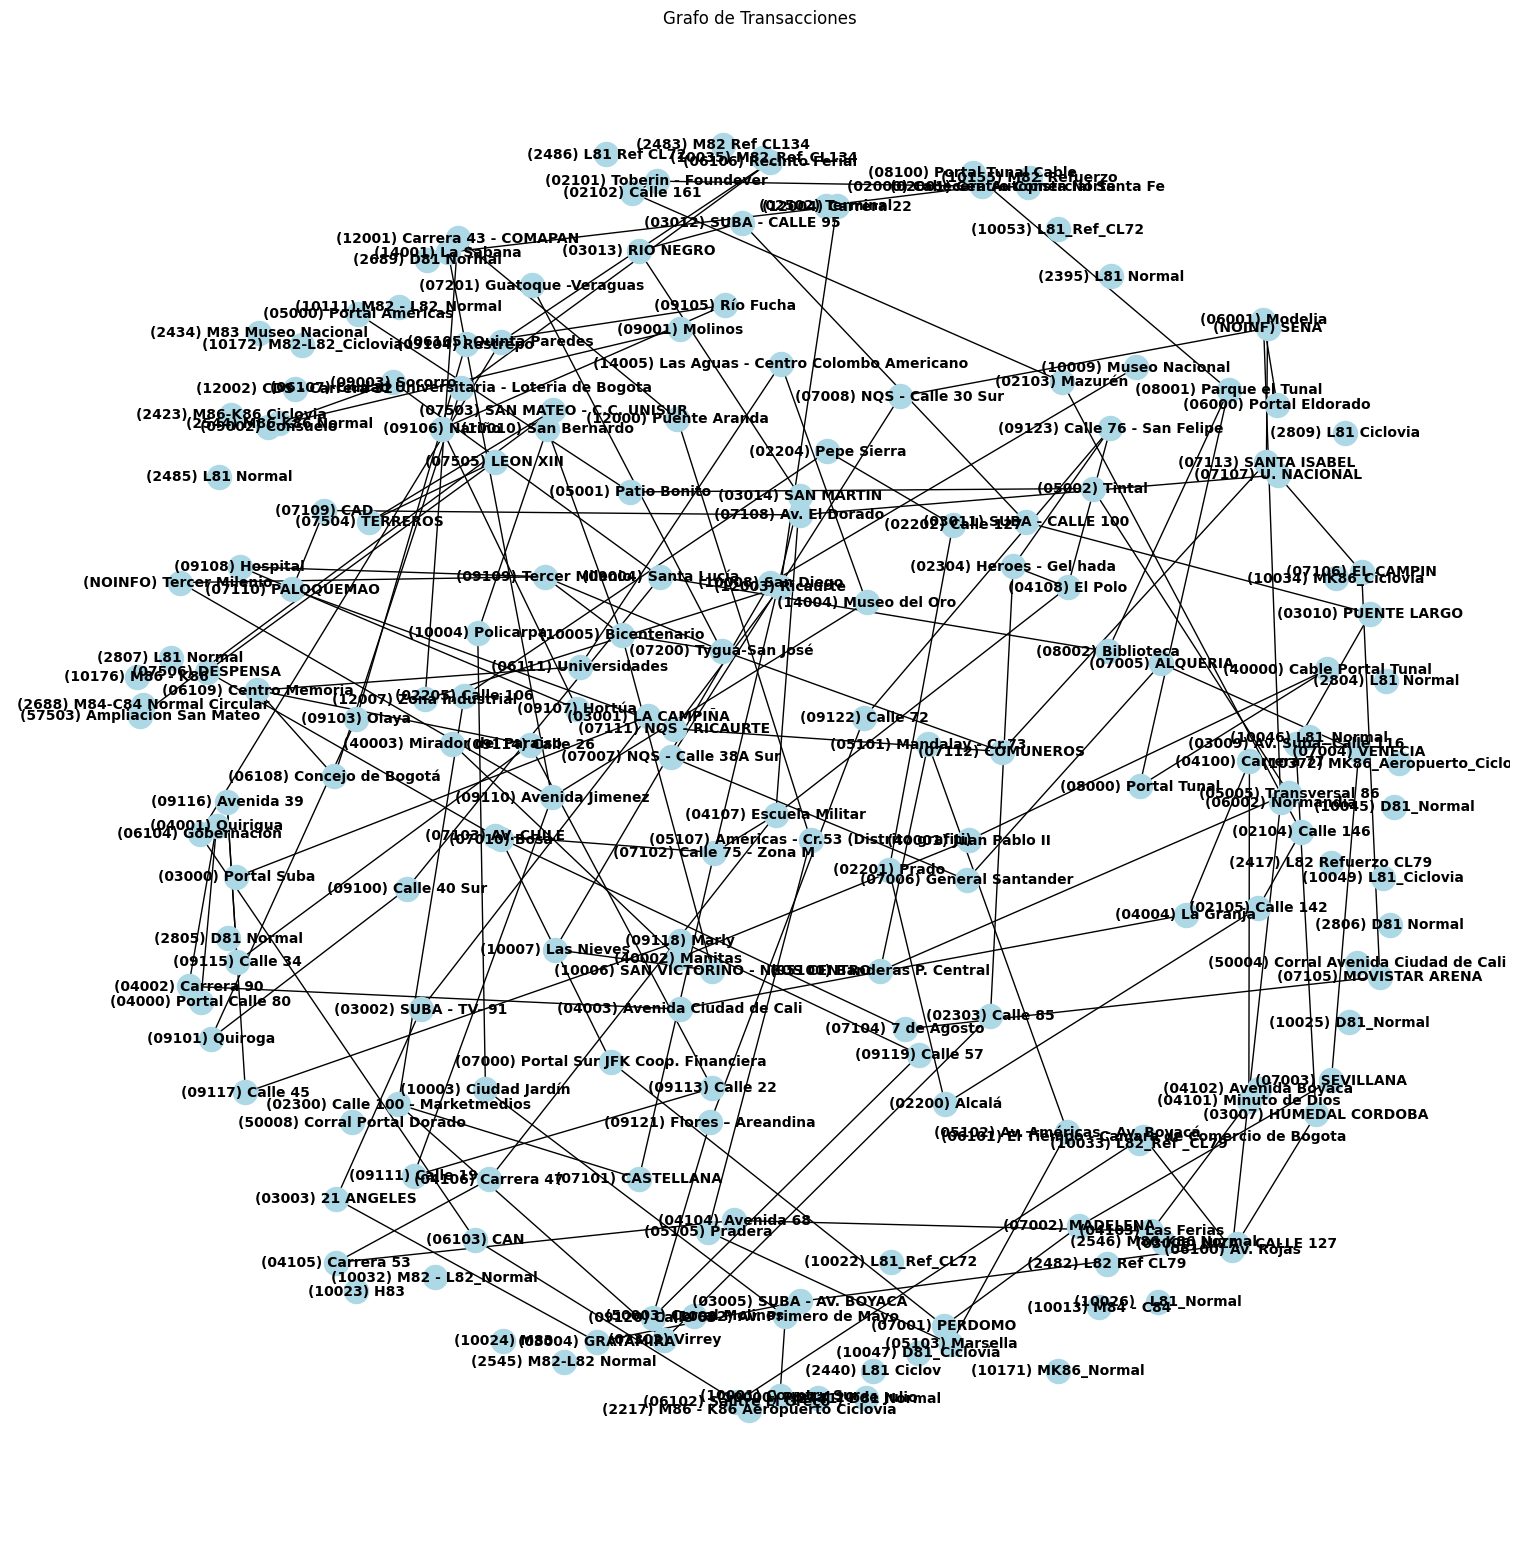

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo no dirigido
G_Semanal = nx.Graph()

# Agregar nodos al grafo con múltiples pesos
for index, row in df.iterrows():
    G_Semanal.add_node(row['Id'], Label=str(row['Label']), weight1=row['PromELunes'], weight2=row['PromEMartes'], weight3=row['PromEMiercoles'], weight4=row['PromEJueves'], weight5=row['PromEViernes'], weight6=row['PromESabado'], weight7=row['PromEDomingo'])

# Agregar aristas al grafo
for index, row in df_edges.iterrows():
    G_Semanal.add_edge(row['Source'], row['Target'], Type=row['Type'], Label='')

# Crear la figura
plt.figure(figsize=(15, 15))

# Definir la disposición de los nodos
pos = nx.spring_layout(G_Semanal, k=0.5)

# Dibujar los nodos con etiquetas
nx.draw(G_Semanal, pos, labels={node: G_Semanal.nodes[node]['Label'] for node in G_Semanal.nodes()}, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)

# Agregar etiquetas de las aristas
edge_labels = {(source, target): attr['Label'] for source, target, attr in G_Semanal.edges(data=True)}
nx.draw_networkx_edge_labels(G_Semanal, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Mostrar el título del gráfico
plt.title('Grafo de Transacciones')

# Mostrar el gráfico
plt.show()


In [ ]:
# Obtener los nodos aislados antes de eliminarlos
isolates = list(nx.isolates(G_Semanal))

# Imprimir cada nodo aislado que será removido
print("Nodos aislados a ser removidos:")
for node in isolates:
    label = G_Semanal.nodes[node]['Label']
    print(f"Nodo {node}: {label}")

# Eliminar nodos aislados del grafo
G_Semanal.remove_nodes_from(isolates)

Nodos aislados a ser removidos:
Nodo 85: (12002) CDS - Carrera 32
Nodo 156: (10013) M84 - C84
Nodo 157: (10023) H83
Nodo 158: (10024) M83
Nodo 159: (10022) L81_Ref_CL72
Nodo 160: (10025) D81_Normal
Nodo 161: (10026)   L81_Normal
Nodo 162: (10034) MK86_Ciclovía
Nodo 163: (10171) MK86_Normal
Nodo 164: (10372) MK86_Aeropuerto_Ciclovía
Nodo 165: (10032) M82 - L82_Normal
Nodo 166: (10033) L82_Ref _CL79
Nodo 167: (10035) M82_Ref_CL134
Nodo 168: (10176) M86 - K86
Nodo 169: (10111) M82 - L82_Normal
Nodo 170: (10155) M82_Refuerzo
Nodo 171: (10172) M82-L82_Ciclovia
Nodo 172: (10045) D81_Normal
Nodo 173: (10046) L81_Normal
Nodo 174: (10047) D81_Ciclovía
Nodo 175: (10049) L81_Ciclovia
Nodo 176: (10053) L81_Ref_CL72
Nodo 177: (50008) Corral Portal Dorado
Nodo 178: (2688) M84-C84 Normal Circular
Nodo 179: (2217) M86 - K86 Aeropuerto Ciclovia
Nodo 180: (2423) M86-K86 Ciclovia
Nodo 181: (2546) M86-K86 Normal
Nodo 182: (2417) L82 Refuerzo CL79
Nodo 183: (2434) M83 Museo Nacional
Nodo 184: (50003) Corra

##Grado medio

In [ ]:
grados = dict(G_Semanal.degree())
print(grados)
grado_medio = sum(grados.values()) / len(grados)
print(f"Grado medio: {grado_medio:.2f}")



{1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 3, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 3, 28: 2, 29: 2, 30: 3, 31: 1, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 3, 44: 2, 45: 1, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 4, 52: 2, 53: 2, 54: 2, 55: 1, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 3, 73: 1, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 86: 3, 87: 2, 88: 4, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 3, 98: 1, 99: 1, 100: 2, 101: 2, 102: 3, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 4, 112: 1, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 4, 125: 3, 126: 2, 127: 2, 128: 1, 129: 2, 130: 2, 131: 2, 132: 3, 133: 2, 134: 2, 135: 2, 136: 3, 137: 2, 138: 2, 139: 2, 14

##Grado medio ponderado

In [ ]:
import math

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight1']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight1']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los lunes:", average_weighted_degree)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight2']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight2']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los martes:", average_weighted_degree)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight3']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight3']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los miercoles:", average_weighted_degree)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight4']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight4']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los jueves:", average_weighted_degree)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight5']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight5']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los viernes:", average_weighted_degree)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight6']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight6']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los sabados:", average_weighted_degree)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight7']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight7']

average_weighted_degree = total_weighted_degree / G_Semanal.number_of_nodes()
print("Grado medio ponderado de la red los domingos:", average_weighted_degree)

Grado medio ponderado de la red los lunes: 11550.367965367961
Grado medio ponderado de la red los martes: 12089.34632034632
Grado medio ponderado de la red los miercoles: 11990.867965367965
Grado medio ponderado de la red los jueves: 11569.211038961039
Grado medio ponderado de la red los viernes: 11680.396103896104
Grado medio ponderado de la red los sabados: 7527.917207792208
Grado medio ponderado de la red los domingos: 3276.694805194805


##Densidad

In [ ]:
density = nx.density(G_Semanal)

print("Densidad de la red:", density)

Densidad de la red: 0.013581190051778286


##Densidad ponderada

In [ ]:
total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight1']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight1']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los lunes:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight2']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight2']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los martes:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight3']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight3']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los miercoles:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight3']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight3']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los miercoles:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight4']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight4']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los jueves:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight5']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight5']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los viernes:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight6']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight6']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los sabados:", density_weighted)

total_weighted_degree = 0
for node in G_Semanal.nodes():
    if not math.isnan(G_Semanal.nodes[node]['weight7']):
        total_weighted_degree = total_weighted_degree + G_Semanal.nodes[node]['weight7']
num_nodes = G_Semanal.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los domingos:", density_weighted)

Densidad ponderada de la red los lunes: 75.49260108083635
Densidad ponderada de la red los martes: 79.01533542710013
Densidad ponderada de la red los miercoles: 78.37168604815663
Densidad ponderada de la red los miercoles: 78.37168604815663
Densidad ponderada de la red los jueves: 75.61575842458195
Densidad ponderada de la red los viernes: 76.34245819539937
Densidad ponderada de la red los sabados: 49.202073253543844
Densidad ponderada de la red los domingos: 21.416305916305916


##Longitud media

In [ ]:
# Calcular la longitud promedio de los caminos
average_path_length = nx.average_shortest_path_length(G_Semanal)

print("Longitud promedio de los caminos:", average_path_length)

Longitud promedio de los caminos: 17.19166454460572


##Diametro

In [ ]:
diameter = nx.diameter(G_Semanal)
print("Diámetro de la red:", diameter)

Diámetro de la red: 43


##Radio

In [ ]:
radius = nx.radius(G_Semanal)
print("Radio de la red:", radius)

Radio de la red: 22


##Eccentricity

In [ ]:
# Calcular la excentricidad de todos los nodos en la red
eccentricities = nx.eccentricity(G_Semanal)

print("Excentricidades de todos los nodos:")
for estacion in G_Semanal.nodes():
    print("Excentricidad del nodo", G_Semanal.nodes[estacion]['Label'], ":", eccentricities[estacion])

Excentricidades de todos los nodos:
Excentricidad del nodo (03000) Portal Suba : 42
Excentricidad del nodo (03001) LA CAMPIÑA : 41
Excentricidad del nodo (03002) SUBA - TV- 91 : 40
Excentricidad del nodo (03003) 21 ANGELES : 39
Excentricidad del nodo (03004) GRATAMIRA : 38
Excentricidad del nodo (03005) SUBA - AV. BOYACA : 37
Excentricidad del nodo (03006) NIZA - CALLE 127 : 36
Excentricidad del nodo (03007) HUMEDAL CORDOBA : 35
Excentricidad del nodo (03009) Av. Suba- Calle 116 : 34
Excentricidad del nodo (03010) PUENTE LARGO : 33
Excentricidad del nodo (03011) SUBA - CALLE 100 : 32
Excentricidad del nodo (03012) SUBA - CALLE 95 : 31
Excentricidad del nodo (03013) RIO NEGRO : 30
Excentricidad del nodo (03014) SAN MARTIN : 29
Excentricidad del nodo (02000) Cabecera Autopista Norte : 42
Excentricidad del nodo (02001) Centro Comercial Santa Fe : 41
Excentricidad del nodo (02101) Toberin - Foundever : 40
Excentricidad del nodo (02102) Calle 161 : 39
Excentricidad del nodo (02103) Mazurén 

##Modularidad

In [ ]:
# Calcular las comunidades utilizando el algoritmo de Louvain
communities = list(nx.community.greedy_modularity_communities(G_Semanal))

# Crear un diccionario de partición
partition = {node: cid for cid, nodes in enumerate(communities) for node in nodes}

# Calcular la modularidad utilizando NetworkX
modularity = nx.community.modularity(G_Semanal, communities)
print("La modularidad es ",modularity)

La modularidad es  0.8238671875000001


##Clases de modularidad

In [ ]:
# Detectar comunidades utilizando el algoritmo de Louvain
communities = nx.community.greedy_modularity_communities(G_Semanal)

# Crear un diccionario de partición (modularity class)
modularity_class = {}
for idx, community in enumerate(communities):
    for node in community:
        modularity_class[node] = idx

print("Modularity class de cada nodo:")
for node, mod_class in modularity_class.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- Modularity class:", mod_class)

Modularity class de cada nodo:
Nodo: (07113) SANTA ISABEL - Modularity class: 0
Nodo: (07112) COMUNEROS - Modularity class: 0
Nodo: (07200) Tygua-San José - Modularity class: 0
Nodo: (07201) Guatoque -Veraguas - Modularity class: 0
Nodo: (NOINFO) Tercer Milenio  - Modularity class: 0
Nodo: (10000) Portal 20 de Julio - Modularity class: 0
Nodo: (10001) Country Sur - Modularity class: 0
Nodo: (10002) Av. Primero de Mayo - Modularity class: 0
Nodo: (10003) Ciudad Jardín - Modularity class: 0
Nodo: (09109) Tercer Milenio - Modularity class: 0
Nodo: (10004) Policarpa - Modularity class: 0
Nodo: (10010) San Bernardo - Modularity class: 0
Nodo: (10006) SAN VICTORINO - NEOS CENTRO - Modularity class: 0
Nodo: (10007) Las Nieves - Modularity class: 0
Nodo: (10008) San Diego - Modularity class: 0
Nodo: (10009) Museo Nacional - Modularity class: 0
Nodo: (10005) Bicentenario - Modularity class: 0
Nodo: (05000) Portal Américas - Modularity class: 1
Nodo: (05001) Patio Bonito - Modularity class: 1
No

##PageRank

In [ ]:
# Calcular el PageRank
pagerank = nx.pagerank(G_Semanal,weight='weight1')

print("PageRank de los nodos los lunes:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_Semanal,weight='weight2')

print("PageRank de los nodos los martes:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_Semanal,weight='weight3')

print("PageRank de los nodos los miercoles:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_Semanal,weight='weight4')

print("PageRank de los nodos los jueves:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_Semanal,weight='weight5')

print("PageRank de los nodos los viernes:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_Semanal,weight='weight6')

print("PageRank de los nodos los sabados:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_Semanal,weight='weight7')

print("PageRank de los nodos los domingos:")
for node, score in pagerank.items():
    print("Nodo:", G_Semanal.nodes[node]['Label'], "- PageRank:", score)

PageRank de los nodos los lunes:
Nodo: (03000) Portal Suba - PageRank: 0.00417023573862438
Nodo: (03001) LA CAMPIÑA - PageRank: 0.007521918471358832
Nodo: (03002) SUBA - TV- 91 - PageRank: 0.00706345068357863
Nodo: (03003) 21 ANGELES - PageRank: 0.006808847574444048
Nodo: (03004) GRATAMIRA - PageRank: 0.006662942723348518
Nodo: (03005) SUBA - AV. BOYACA - PageRank: 0.006579159357812555
Nodo: (03006) NIZA - CALLE 127 - PageRank: 0.006523503665320806
Nodo: (03007) HUMEDAL CORDOBA - PageRank: 0.0064802208435135135
Nodo: (03009) Av. Suba- Calle 116 - PageRank: 0.006430735610333761
Nodo: (03010) PUENTE LARGO - PageRank: 0.006360316075057238
Nodo: (03011) SUBA - CALLE 100 - PageRank: 0.006241944579246827
Nodo: (03012) SUBA - CALLE 95 - PageRank: 0.006035500487630392
Nodo: (03013) RIO NEGRO - PageRank: 0.0056669447733338875
Nodo: (03014) SAN MARTIN - PageRank: 0.007510443649241354
Nodo: (02000) Cabecera Autopista Norte - PageRank: 0.007522472841426651
Nodo: (02001) Centro Comercial Santa Fe -

##Clustering coeficcient

In [ ]:
# Calcular el coeficiente de agrupamiento ponderado
weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight1')

print("Coeficiente de agrupamiento ponderado lunes:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight2')

print("Coeficiente de agrupamiento ponderado martes:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight3')

print("Coeficiente de agrupamiento ponderado miercoles:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight4')

print("Coeficiente de agrupamiento ponderado jueves:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight5')

print("Coeficiente de agrupamiento ponderado viernes:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight6')

print("Coeficiente de agrupamiento ponderado sabado:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_Semanal, weight='weight7')

print("Coeficiente de agrupamiento ponderado domingo:", weighted_clustering_coefficient)

Coeficiente de agrupamiento ponderado lunes: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0.3333333333333333, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0.3333333333333333, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0.16666666666666666, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 86: 0, 87: 0, 88: 0.16666666666666666, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0.16666666666666666, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 

#Análisis para la troncal k los 7 dias de la semana independientemente

##Cargar datos semanales

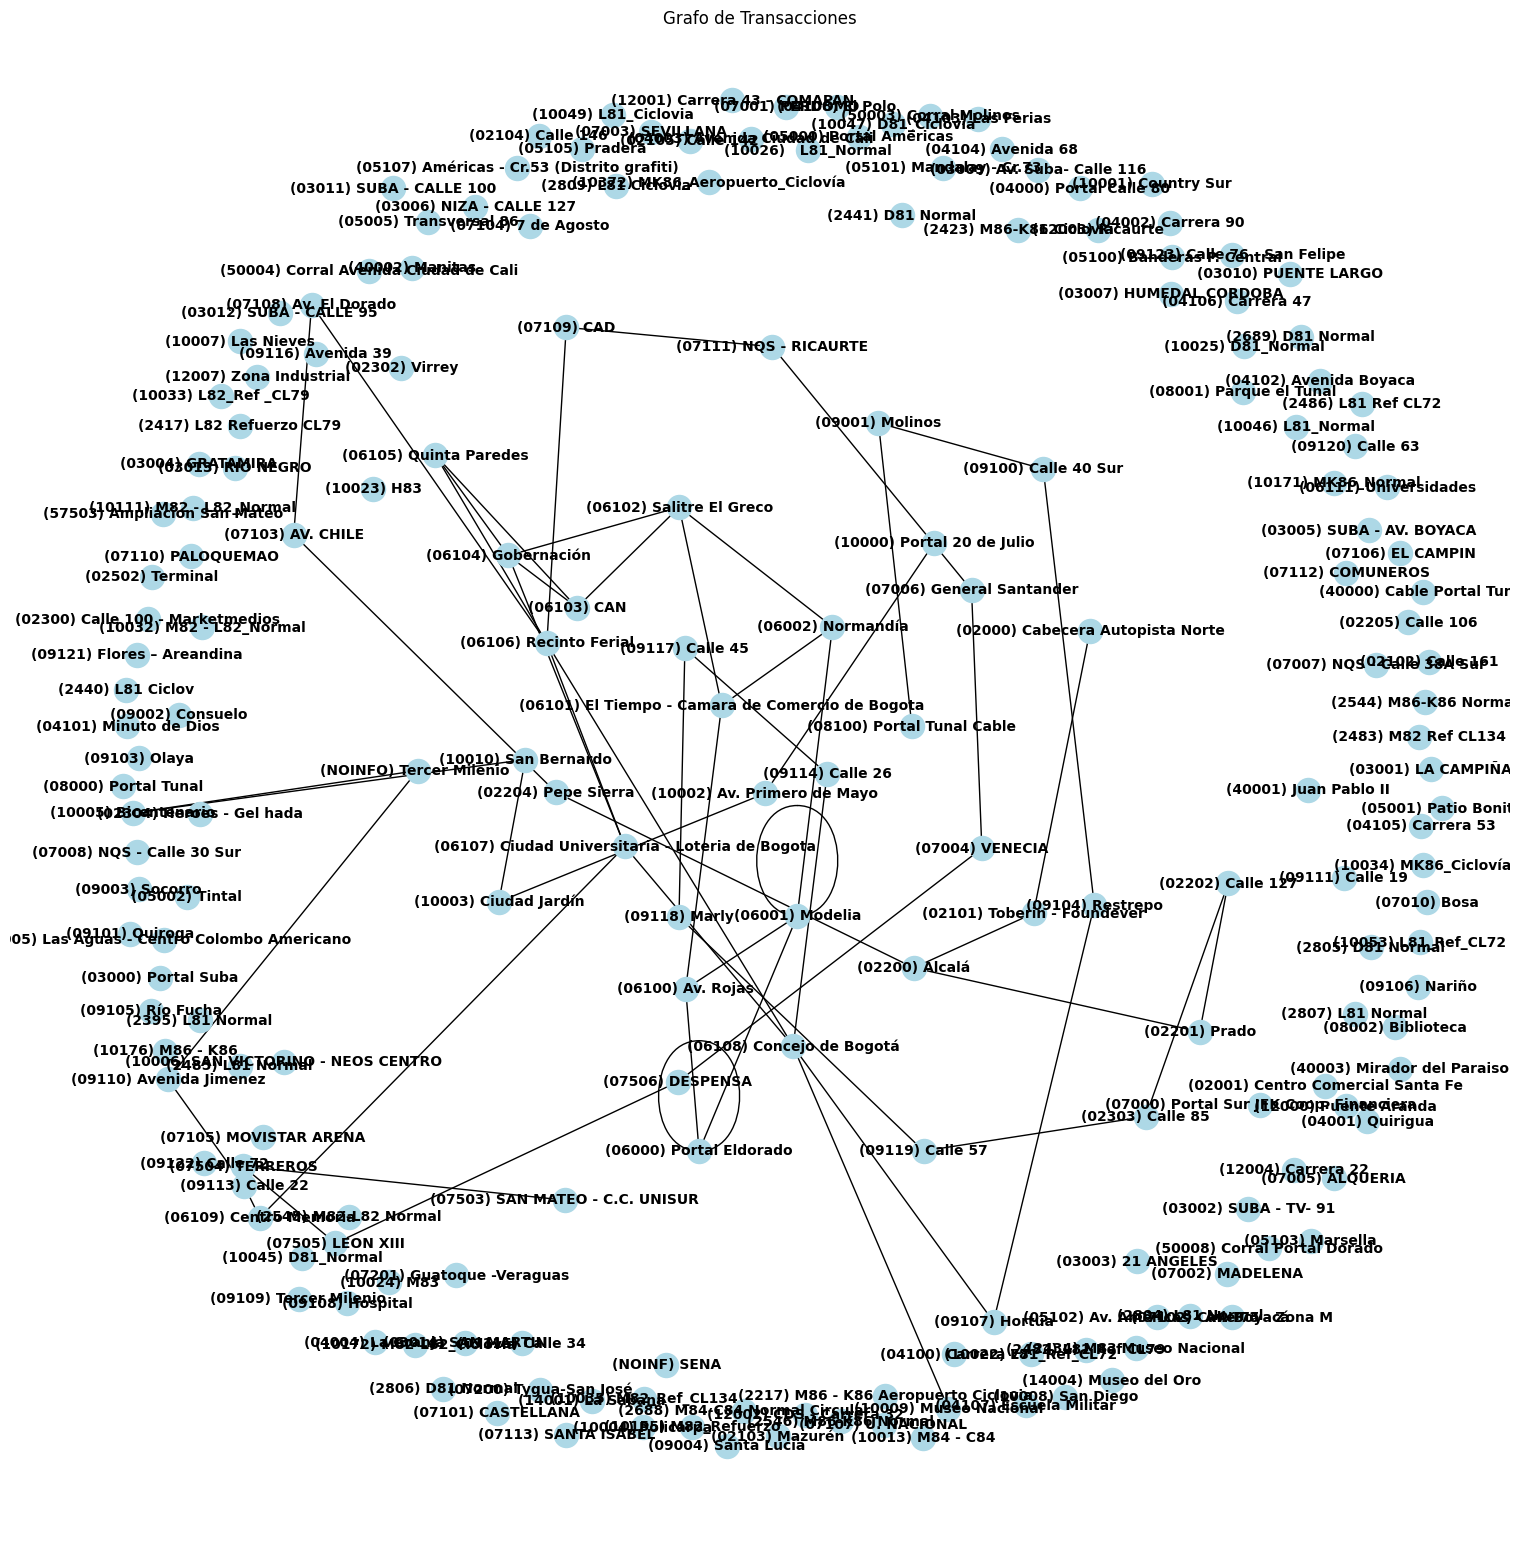

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

df_edges = pd.read_excel('links ruta K.xlsx')

# Crear un grafo no dirigido
G_SemanalK = nx.Graph()

# Agregar nodos al grafo con múltiples pesos
for index, row in df.iterrows():
    G_SemanalK.add_node(row['Id'], Label=str(row['Label']), weight1=row['PromELunes'], weight2=row['PromEMartes'], weight3=row['PromEMiercoles'], weight4=row['PromEJueves'], weight5=row['PromEViernes'], weight6=row['PromESabado'], weight7=row['PromEDomingo'])

# Agregar aristas al grafo
for index, row in df_edges.iterrows():
    G_SemanalK.add_edge(row['Source'], row['Target'], Type=row['Type'], Label='')

# Crear la figura
plt.figure(figsize=(15, 15))

# Definir la disposición de los nodos
pos = nx.spring_layout(G_SemanalK, k=0.5)

# Dibujar los nodos con etiquetas
nx.draw(G_SemanalK, pos, labels={node: G_SemanalK.nodes[node]['Label'] for node in G_SemanalK.nodes()}, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)

# Agregar etiquetas de las aristas
edge_labels = {(source, target): attr['Label'] for source, target, attr in G_SemanalK.edges(data=True)}
nx.draw_networkx_edge_labels(G_SemanalK, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Mostrar el título del gráfico
plt.title('Grafo de Transacciones')

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener los nodos aislados antes de eliminarlos
isolates = list(nx.isolates(G_SemanalK))

# Imprimir cada nodo aislado que será removido
print("Nodos aislados a ser removidos:")
for node in isolates:
    label = G_SemanalK.nodes[node]['Label']
    print(f"Nodo {node}: {label}")

# Eliminar nodos aislados del grafo
G_SemanalK.remove_nodes_from(isolates)
print(G_SemanalK.number_of_nodes())

Nodos aislados a ser removidos:
Nodo 1: (03000) Portal Suba
Nodo 2: (03001) LA CAMPIÑA
Nodo 3: (03002) SUBA - TV- 91
Nodo 4: (03003) 21 ANGELES
Nodo 5: (03004) GRATAMIRA
Nodo 6: (03005) SUBA - AV. BOYACA
Nodo 7: (03006) NIZA - CALLE 127
Nodo 8: (03007) HUMEDAL CORDOBA
Nodo 9: (03009) Av. Suba- Calle 116
Nodo 10: (03010) PUENTE LARGO
Nodo 11: (03011) SUBA - CALLE 100
Nodo 12: (03012) SUBA - CALLE 95
Nodo 13: (03013) RIO NEGRO
Nodo 14: (03014) SAN MARTIN
Nodo 16: (02001) Centro Comercial Santa Fe
Nodo 18: (02102) Calle 161
Nodo 19: (02103) Mazurén
Nodo 20: (02104) Calle 146
Nodo 21: (02105) Calle 142
Nodo 26: (02205) Calle 106
Nodo 27: (02300) Calle 100 - Marketmedios
Nodo 28: (02302) Virrey
Nodo 30: (02304) Heroes - Gel hada
Nodo 44: (06111) Universidades
Nodo 46: (10001) Country Sur
Nodo 49: (10004) Policarpa
Nodo 52: (10006) SAN VICTORINO - NEOS CENTRO
Nodo 53: (10007) Las Nieves
Nodo 54: (10008) San Diego
Nodo 60: (07010) Bosa
Nodo 61: (07000) Portal Sur JFK Coop. Financiera
Nodo 62:

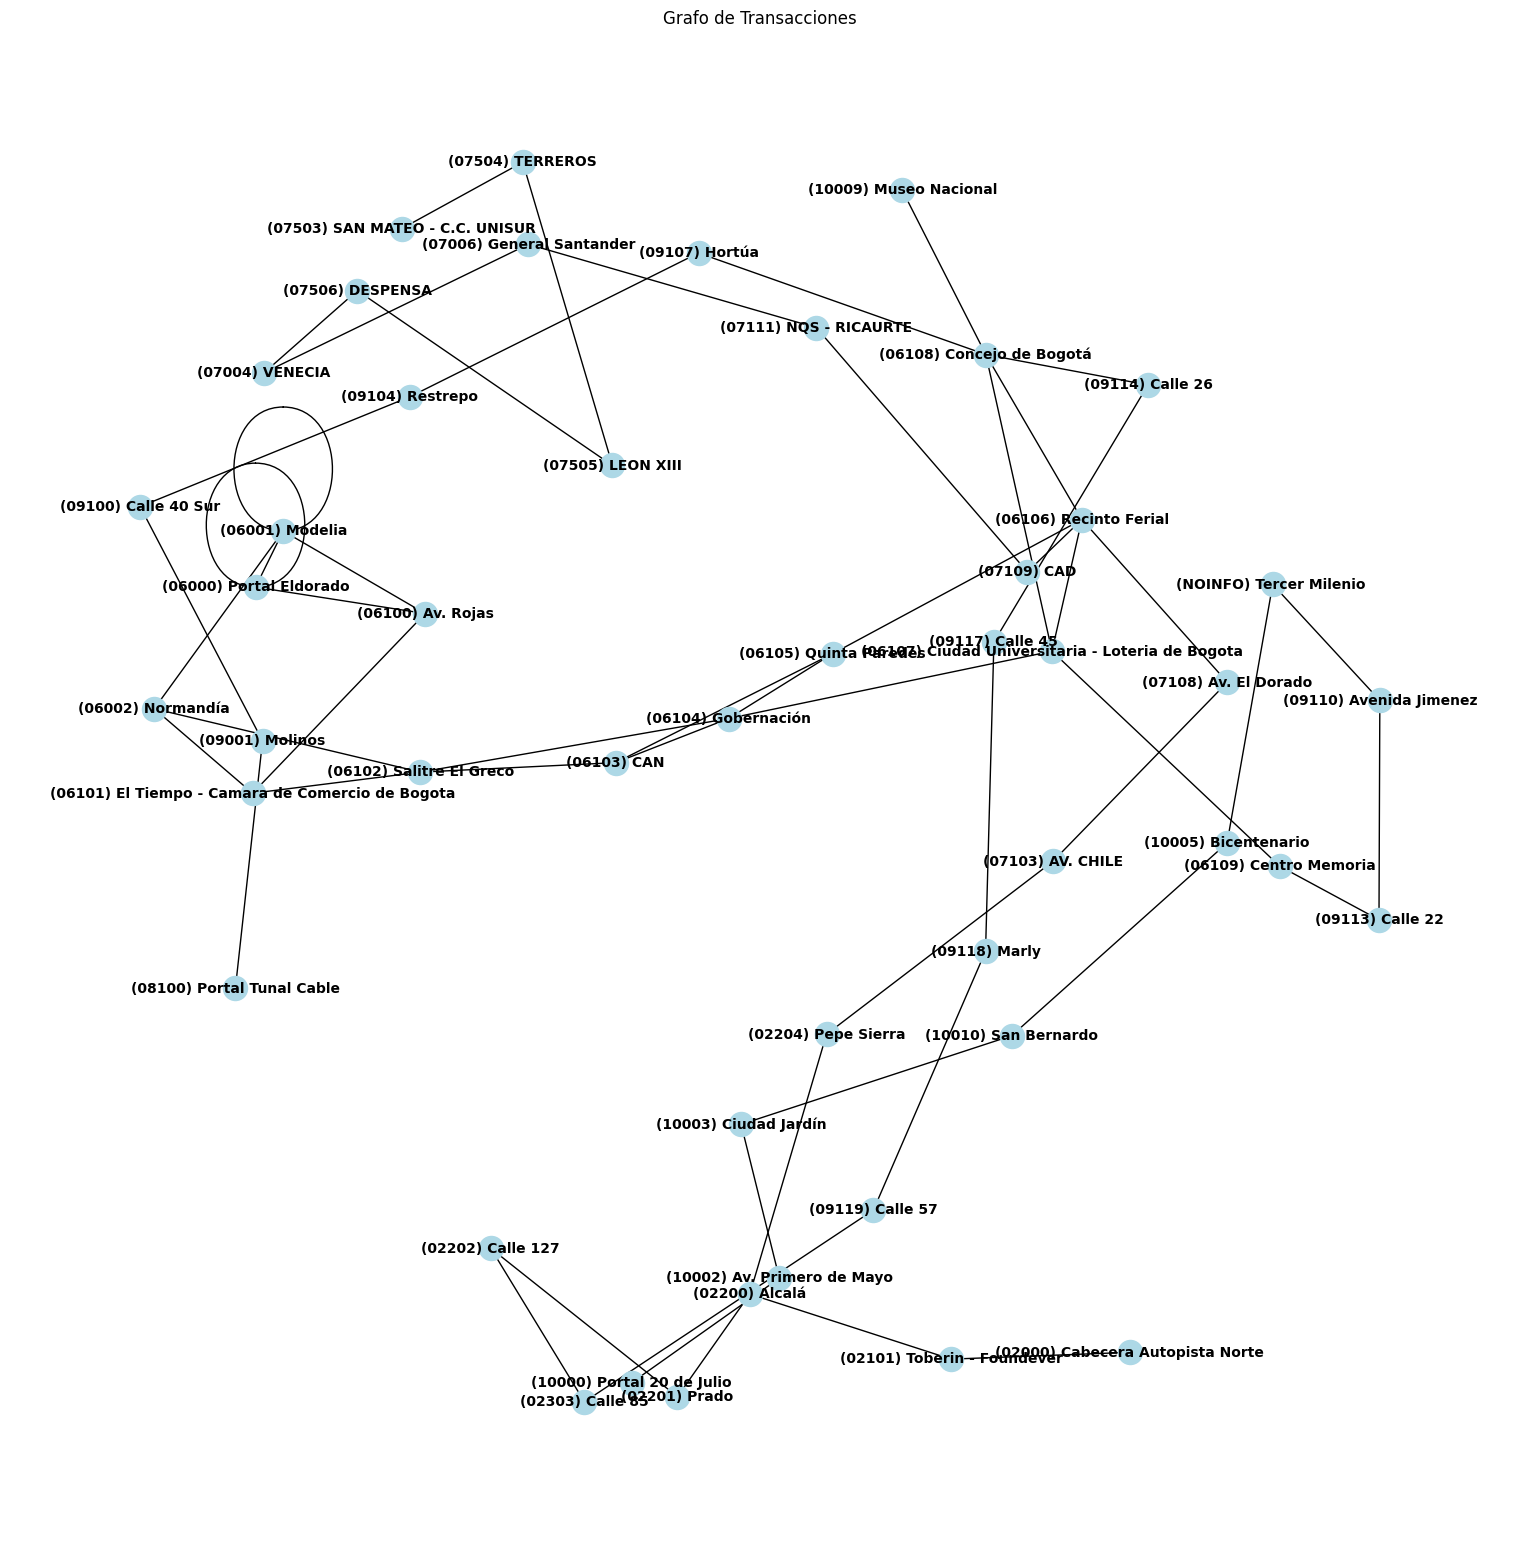

In [ ]:
# Crear la figura
plt.figure(figsize=(15, 15))

# Definir la disposición de los nodos
pos = nx.spring_layout(G_SemanalK, k=0.5)

# Dibujar los nodos con etiquetas
nx.draw(G_SemanalK, pos, labels={node: G_SemanalK.nodes[node]['Label'] for node in G_SemanalK.nodes()}, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)

# Agregar etiquetas de las aristas
edge_labels = {(source, target): attr['Label'] for source, target, attr in G_SemanalK.edges(data=True)}
nx.draw_networkx_edge_labels(G_SemanalK, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Mostrar el título del gráfico
plt.title('Grafo de Transacciones')

# Mostrar el gráfico
plt.show()

##Grado medio

In [ ]:
grados = dict(G_SemanalK.degree())
print(grados)
grado_medio = sum(grados.values()) / len(grados)
print(f"Grado medio: {grado_medio:.2f}")

{15: 1, 17: 2, 22: 3, 23: 2, 24: 2, 25: 2, 29: 2, 31: 4, 32: 5, 33: 3, 34: 3, 35: 3, 36: 4, 37: 3, 38: 4, 39: 3, 40: 5, 41: 4, 42: 5, 43: 2, 45: 1, 47: 2, 48: 2, 50: 2, 51: 2, 55: 1, 56: 1, 57: 2, 58: 2, 59: 2, 65: 2, 67: 2, 89: 2, 94: 2, 95: 2, 97: 2, 98: 1, 99: 2, 103: 2, 106: 2, 109: 2, 135: 2, 136: 2, 139: 2, 140: 2, 141: 2, 150: 2, 153: 2}
Grado medio: 2.38


##Grado medio ponderado

In [ ]:
import math

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight1']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight1']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los lunes:", average_weighted_degree)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight2']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight2']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los martes:", average_weighted_degree)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight3']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight3']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los miercoles:", average_weighted_degree)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight4']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight4']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los jueves:", average_weighted_degree)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight5']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight5']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los viernes:", average_weighted_degree)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight6']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight6']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los sabados:", average_weighted_degree)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight7']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight7']

average_weighted_degree = total_weighted_degree / G_SemanalK.number_of_nodes()
print("Grado medio ponderado de la red los domingos:", average_weighted_degree)

Grado medio ponderado de la red los lunes: 14352.22222222222
Grado medio ponderado de la red los martes: 14730.263888888889
Grado medio ponderado de la red los miercoles: 14605.395833333336
Grado medio ponderado de la red los jueves: 14336.234375
Grado medio ponderado de la red los viernes: 14371.901041666666
Grado medio ponderado de la red los sabados: 9091.510416666666
Grado medio ponderado de la red los domingos: 4154.046875


##Densidad

In [ ]:
density = nx.density(G_SemanalK)

print("Densidad de la red:", density)

Densidad de la red: 0.05053191489361702


##Densidad ponderada

In [ ]:
total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight1']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight1']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los lunes:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight2']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight2']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los martes:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight3']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight3']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los miercoles:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight3']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight3']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los miercoles:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight4']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight4']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los jueves:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight5']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight5']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los viernes:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight6']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight6']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los sabados:", density_weighted)

total_weighted_degree = 0
for node in G_SemanalK.nodes():
    if not math.isnan(G_SemanalK.nodes[node]['weight7']):
        total_weighted_degree = total_weighted_degree + G_SemanalK.nodes[node]['weight7']
num_nodes = G_SemanalK.number_of_nodes()
density_weighted = total_weighted_degree / (num_nodes * (num_nodes - 1))

print("Densidad ponderada de la red los domingos:", density_weighted)

Densidad ponderada de la red los lunes: 305.36643026004725
Densidad ponderada de la red los martes: 313.40986997635935
Densidad ponderada de la red los miercoles: 310.75310283687946
Densidad ponderada de la red los miercoles: 310.75310283687946
Densidad ponderada de la red los jueves: 305.02626329787233
Densidad ponderada de la red los viernes: 305.7851285460993
Densidad ponderada de la red los sabados: 193.43639184397162
Densidad ponderada de la red los domingos: 88.38397606382979


##Longitud media

In [ ]:
# Calcular la longitud promedio de los caminos
average_path_length = nx.average_shortest_path_length(G_SemanalK)

print("Longitud promedio de los caminos:", average_path_length)

Longitud promedio de los caminos: 6.898936170212766


##Diametro

In [ ]:
diameter = nx.diameter(G_SemanalK)
print("Diámetro de la red:", diameter)

Diámetro de la red: 18


##Radio

In [ ]:
radius = nx.radius(G_SemanalK)
print("Radio de la red:", radius)

Radio de la red: 9


##Eccentricity

In [ ]:
# Calcular la excentricidad de todos los nodos en la red
eccentricities = nx.eccentricity(G_SemanalK)

print("Excentricidades de todos los nodos:")
for estacion in G_SemanalK.nodes():
    print("Excentricidad del nodo", G_SemanalK.nodes[estacion]['Label'], ":", eccentricities[estacion])

Excentricidades de todos los nodos:
Excentricidad del nodo (02000) Cabecera Autopista Norte : 16
Excentricidad del nodo (02101) Toberin - Foundever : 15
Excentricidad del nodo (02200) Alcalá : 14
Excentricidad del nodo (02201) Prado : 15
Excentricidad del nodo (02202) Calle 127 : 16
Excentricidad del nodo (02204) Pepe Sierra : 13
Excentricidad del nodo (02303) Calle 85 : 15
Excentricidad del nodo (06000) Portal Eldorado : 14
Excentricidad del nodo (06001) Modelia : 13
Excentricidad del nodo (06002) Normandía : 12
Excentricidad del nodo (06100) Av. Rojas : 13
Excentricidad del nodo (06101) El Tiempo - Camara de Comercio de Bogota : 12
Excentricidad del nodo (06102) Salitre El Greco : 11
Excentricidad del nodo (06103) CAN : 11
Excentricidad del nodo (06104) Gobernación : 10
Excentricidad del nodo (06105) Quinta Paredes : 11
Excentricidad del nodo (06106) Recinto Ferial : 10
Excentricidad del nodo (06107) Ciudad Universitaria - Loteria de Bogota : 9
Excentricidad del nodo (06108) Concejo 

##Modularidad

In [ ]:
# Calcular las comunidades utilizando el algoritmo de Louvain
communities = list(nx.community.greedy_modularity_communities(G_SemanalK))

# Crear un diccionario de partición
partition = {node: cid for cid, nodes in enumerate(communities) for node in nodes}

# Calcular la modularidad utilizando NetworkX
modularity = nx.community.modularity(G_SemanalK, communities)
print("La modularidad es ",modularity)

La modularidad es  0.6934441366574331


##Clases de modularidad

In [ ]:
# Detectar comunidades utilizando el algoritmo de Louvain
communities = nx.community.greedy_modularity_communities(G_SemanalK)

# Crear un diccionario de partición (modularity class)
modularity_class = {}
for idx, community in enumerate(communities):
    for node in community:
        modularity_class[node] = idx

print("Modularity class de cada nodo:")
for node, mod_class in modularity_class.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- Modularity class:", mod_class)

Modularity class de cada nodo:
Nodo: (09113) Calle 22 - Modularity class: 0
Nodo: (06109) Centro Memoria - Modularity class: 0
Nodo: (10000) Portal 20 de Julio - Modularity class: 0
Nodo: (10002) Av. Primero de Mayo - Modularity class: 0
Nodo: (10003) Ciudad Jardín - Modularity class: 0
Nodo: (10010) San Bernardo - Modularity class: 0
Nodo: (10005) Bicentenario - Modularity class: 0
Nodo: (09110) Avenida Jimenez - Modularity class: 0
Nodo: (NOINFO) Tercer Milenio  - Modularity class: 0
Nodo: (07004) VENECIA - Modularity class: 1
Nodo: (07111) NQS - RICAURTE - Modularity class: 1
Nodo: (07006) General Santander - Modularity class: 1
Nodo: (07503) SAN MATEO - C.C. UNISUR - Modularity class: 1
Nodo: (07504) TERREROS - Modularity class: 1
Nodo: (07505) LEON XIII - Modularity class: 1
Nodo: (07506) DESPENSA - Modularity class: 1
Nodo: (07109) CAD - Modularity class: 1
Nodo: (09119) Calle 57 - Modularity class: 2
Nodo: (02201) Prado - Modularity class: 2
Nodo: (09114) Calle 26 - Modularity c

##Page Rank

In [ ]:
# Calcular el PageRank
pagerank = nx.pagerank(G_SemanalK,weight='weight1')

print("PageRank de los nodos los lunes:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_SemanalK,weight='weight2')

print("PageRank de los nodos los martes:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_SemanalK,weight='weight3')

print("PageRank de los nodos los miercoles:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_SemanalK,weight='weight4')

print("PageRank de los nodos los jueves:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_SemanalK,weight='weight5')

print("PageRank de los nodos los viernes:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_SemanalK,weight='weight6')

print("PageRank de los nodos los sabados:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)
print()
print()

pagerank = nx.pagerank(G_SemanalK,weight='weight7')

print("PageRank de los nodos los domingos:")
for node, score in pagerank.items():
    print("Nodo:", G_SemanalK.nodes[node]['Label'], "- PageRank:", score)

PageRank de los nodos los lunes:
Nodo: (02000) Cabecera Autopista Norte - PageRank: 0.012476710287200193
Nodo: (02101) Toberin - Foundever - PageRank: 0.02200428424163214
Nodo: (02200) Alcalá - PageRank: 0.029201700404032162
Nodo: (02201) Prado - PageRank: 0.020014666746004554
Nodo: (02202) Calle 127 - PageRank: 0.020271718997605565
Nodo: (02204) Pepe Sierra - PageRank: 0.019338738953165884
Nodo: (02303) Calle 85 - PageRank: 0.020331564382977063
Nodo: (06000) Portal Eldorado - PageRank: 0.019424806626692447
Nodo: (06001) Modelia - PageRank: 0.02489303328899573
Nodo: (06002) Normandía - PageRank: 0.019299729744359815
Nodo: (06100) Av. Rojas - PageRank: 0.019434464828112646
Nodo: (06101) El Tiempo - Camara de Comercio de Bogota - PageRank: 0.01946855826321677
Nodo: (06102) Salitre El Greco - PageRank: 0.025265588861783688
Nodo: (06103) CAN - PageRank: 0.01983397272385749
Nodo: (06104) Gobernación - PageRank: 0.02605529605820566
Nodo: (06105) Quinta Paredes - PageRank: 0.02048215406977245

##Clustering coeficcient

In [ ]:
# Calcular el coeficiente de agrupamiento ponderado
weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight1')

print("Coeficiente de agrupamiento ponderado lunes:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight2')

print("Coeficiente de agrupamiento ponderado martes:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight3')

print("Coeficiente de agrupamiento ponderado miercoles:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight4')

print("Coeficiente de agrupamiento ponderado jueves:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight5')

print("Coeficiente de agrupamiento ponderado viernes:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight6')

print("Coeficiente de agrupamiento ponderado sabado:", weighted_clustering_coefficient)

weighted_clustering_coefficient = nx.clustering(G_SemanalK, weight='weight7')

print("Coeficiente de agrupamiento ponderado domingo:", weighted_clustering_coefficient)

Coeficiente de agrupamiento ponderado lunes: {15: 0, 17: 0, 22: 0, 23: 0, 24: 0, 25: 0, 29: 0, 31: 1.0, 32: 0.3333333333333333, 33: 0.3333333333333333, 34: 0.3333333333333333, 35: 0.3333333333333333, 36: 0.3333333333333333, 37: 0.6666666666666666, 38: 0.3333333333333333, 39: 0.3333333333333333, 40: 0.1, 41: 0.16666666666666666, 42: 0.1, 43: 0, 45: 0, 47: 0, 48: 0, 50: 0, 51: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 65: 0, 67: 0, 89: 0, 94: 0, 95: 0, 97: 0, 98: 0, 99: 0, 103: 0, 106: 0, 109: 0, 135: 0, 136: 0, 139: 0, 140: 0, 141: 0, 150: 0, 153: 0}
Coeficiente de agrupamiento ponderado martes: {15: 0, 17: 0, 22: 0, 23: 0, 24: 0, 25: 0, 29: 0, 31: 1.0, 32: 0.3333333333333333, 33: 0.3333333333333333, 34: 0.3333333333333333, 35: 0.3333333333333333, 36: 0.3333333333333333, 37: 0.6666666666666666, 38: 0.3333333333333333, 39: 0.3333333333333333, 40: 0.1, 41: 0.16666666666666666, 42: 0.1, 43: 0, 45: 0, 47: 0, 48: 0, 50: 0, 51: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 65: 0, 67: 0, 89: 0, 94: 0, 95:

#Graficos de barras

##Limpiando los datos

In [ ]:
import matplotlib.pyplot as plt
# Función para procesar un archivo y crear un diccionario con los datos
def procesar_archivo(archivo):
    datos = {}
    estacion_actual = None

    with open(archivo, "r") as file:
        for linea in file:
            if linea.startswith("Estación:"):
                estacion_actual = " ".join(linea.split(" ")[1:]).strip()
                datos[estacion_actual] = []
            elif linea.startswith("Fecha:"):
                ingresos = int(linea.split(":")[-1].strip())
                datos[estacion_actual].append(ingresos)
    return datos

# Proceso para quitar las estaciones que no aparecen en los dos archivos
entradas = procesar_archivo("IngresosEstacionPorFecha.txt")
print(len(entradas))
print(entradas)
salidas = procesar_archivo("SalidasEstacionPorFecha.txt")
print(salidas)
print(len(salidas))

estaciones_entradas = set(entradas.keys())
estaciones_salidas = set(salidas.keys())

# Estaciones presentes solo en el archivo de entradas
estaciones_solo_entradas = estaciones_entradas - estaciones_salidas

# Estaciones presentes solo en el archivo de salidas
estaciones_solo_salidas = estaciones_salidas - estaciones_entradas

##estaciones_entradas_quitar = estaciones_solo_entradas.keys()
entradas = {k: v for k, v in entradas.items() if k not in estaciones_solo_entradas}

print(entradas)
#for entrada in entradas:
  #print(entrada)
print(" ")
print(len(entradas))

salidas = {k: v for k, v in salidas.items() if k not in estaciones_solo_salidas}

print(salidas)
print(" ")
print(len(salidas))

# Resta las salidas correspondientes a las entradas de cada día
entradas_salidas = {}
for estacion in entradas:
    entradas_salidas[estacion]= []
    #if estacion == '(06000) Portal Eldorado':
    #print("Estacion ", estacion)
    for i in range(len(entradas[estacion])):
        #print("entradas " ,entradas[estacion][i])
        #print("salidas " ,salidas[estacion][i])
        ingresos_restados = entradas[estacion][i] - salidas[estacion][i]
        #if ingresos_restados >0:
          #print(estacion)
        entradas_salidas[estacion].append(ingresos_restados)
        #print("Resultado " ,entradas_salidas[estacion][i])
print(entradas_salidas)

200
{'(10013) M84 - C84': [9168, 8974, 5738, 2304, 9240, 9290, 9402, 9095, 9512, 5661, 2233, 8577, 9259, 9055, 9203, 9035, 5812, 2257, 9173, 9439, 9005, 9132, 8985, 5917, 2195], '(10023) H83': [103, 75, 22, 20, 31, 18, 17, 158, 19, 34, 6, 22, 23, 28, 168, 28, 10, 36, 36, 171, 35, 39, 31, 120, 11], '(10024) M83': [3159, 3174, 2204, 1023, 3040, 3157, 3115, 2923, 3155, 2212, 1207, 3139, 3270, 3268, 3112, 3248, 2189, 1222, 3195, 3358, 3228, 3217, 3329, 2261, 1178], '(10022) L81_Ref_CL72': [1114, 1005, 0, 124, 1171, 1011, 1195, 768, 880, 0, 144, 923, 1216, 1176, 1165, 1175, 92, 170, 962, 1083, 1019, 1004, 936, 0, 0], '(10025) D81_Normal': [4921, 5069, 1966, 81, 5183, 5289, 5429, 4927, 5020, 2024, 22, 5433, 5433, 5153, 5343, 4938, 2100, 166, 5265, 5338, 5486, 5389, 4907, 2037, 10], '(10026)   L81_Normal': [18526, 18874, 10946, 968, 18394, 18224, 19038, 18566, 19456, 11517, 700, 17979, 19526, 18660, 19327, 18925, 11200, 220, 17403, 19070, 19317, 19260, 19074, 11367, 79], '(10034) MK86_Cicloví

##La cantidad de personas de salida y entrada para las 10 estaciones más concurridas (Mensual)

###Entradas

155


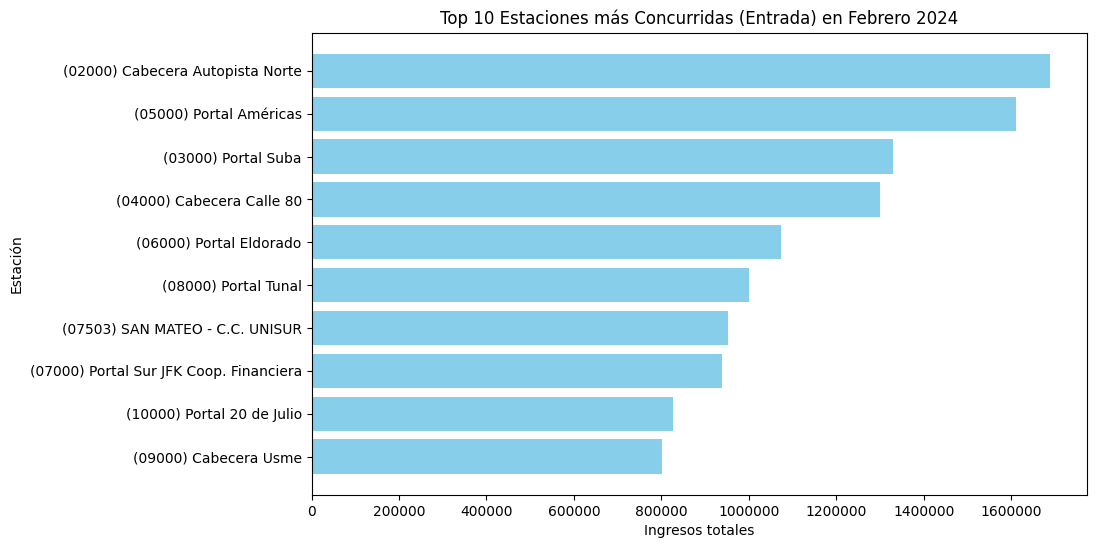

In [ ]:
suma_ingresos = {estacion: sum(ingresos) for estacion, ingresos in entradas.items()}
print(len(entradas))

# Ordena las estaciones por la suma de ingresos totales y selecciona las 10 más concurridas
top_10_estaciones = sorted(suma_ingresos.items(), key=lambda x: x[1], reverse=True)[:10]

# Extrae los nombres y las sumas de ingresos totales de las 10 estaciones más concurridas
nombres_estaciones = [estacion[0] for estacion in top_10_estaciones]
ingresos_totales = [estacion[1] for estacion in top_10_estaciones]

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(nombres_estaciones, ingresos_totales, color='skyblue')
plt.xlabel('Ingresos totales')
plt.ylabel('Estación')
plt.title('Top 10 Estaciones más Concurridas (Entrada) en Febrero 2024')
plt.gca().invert_yaxis()  # Invertir el eje y para que la estación con más ingresos esté en la parte superior
plt.ticklabel_format(style='plain', axis='x')
plt.show()

###Salidas

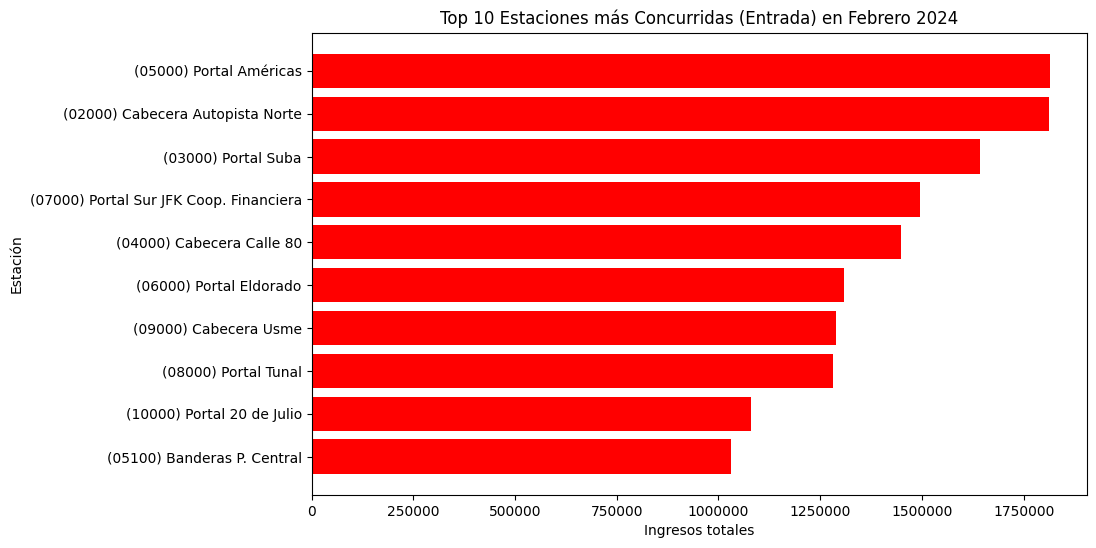

In [ ]:
# Calcula la suma de ingresos totales para cada estación
suma_ingresos = {estacion: sum(ingresos) for estacion, ingresos in salidas.items()}

# Ordena las estaciones por la suma de ingresos totales y selecciona las 10 más concurridas
top_10_estaciones = sorted(suma_ingresos.items(), key=lambda x: x[1], reverse=True)[:10]

# Extrae los nombres y las sumas de ingresos totales de las 10 estaciones más concurridas
nombres_estaciones = [estacion[0] for estacion in top_10_estaciones]
ingresos_totales = [estacion[1] for estacion in top_10_estaciones]

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(nombres_estaciones, ingresos_totales, color='red')
plt.xlabel('Ingresos totales')
plt.ylabel('Estación')
plt.title('Top 10 Estaciones más Concurridas (Entrada) en Febrero 2024')
plt.gca().invert_yaxis()  # Invertir el eje y para que la estación con más ingresos esté en la parte superior
plt.ticklabel_format(style='plain', axis='x')
plt.show()

###Entradas - Salidas

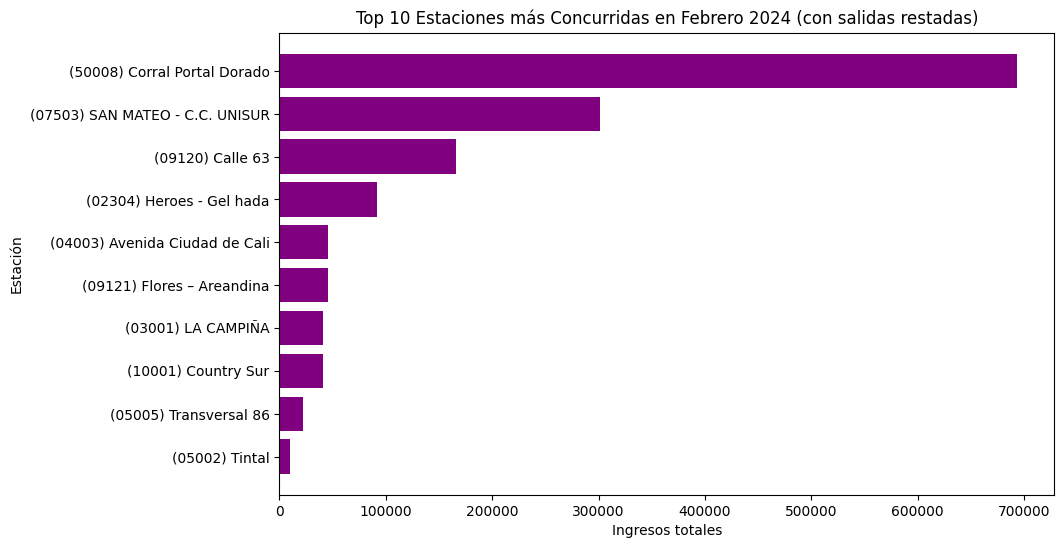

In [ ]:
# Calcula la suma de ingresos totales para cada estación
suma_ingresos = {estacion: sum(ingresos) for estacion, ingresos in entradas_salidas.items()}

# Ordena las estaciones por la suma de ingresos totales y selecciona las 10 más concurridas
top_10_estaciones = sorted(suma_ingresos.items(), key=lambda x: x[1], reverse=True)[:10]

# Extrae los nombres y las sumas de ingresos totales de las 10 estaciones más concurridas
nombres_estaciones = [estacion[0] for estacion in top_10_estaciones]
ingresos_totales = [estacion[1] for estacion in top_10_estaciones]

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(nombres_estaciones, ingresos_totales, color='purple')
plt.xlabel('Ingresos totales')
plt.ylabel('Estación')
plt.title('Top 10 Estaciones más Concurridas en Febrero 2024 (con salidas restadas)')
plt.gca().invert_yaxis()  # Invertir el eje y para que la estación con más ingresos esté en la parte superior
plt.ticklabel_format(style='plain', axis='x')  # Ajustar el formato de los números en el eje x
plt.show()

##La cantidad de personas de salida y entrada para las 10 estaciones más concurridas (Diaria por 7 días)

###Entradas

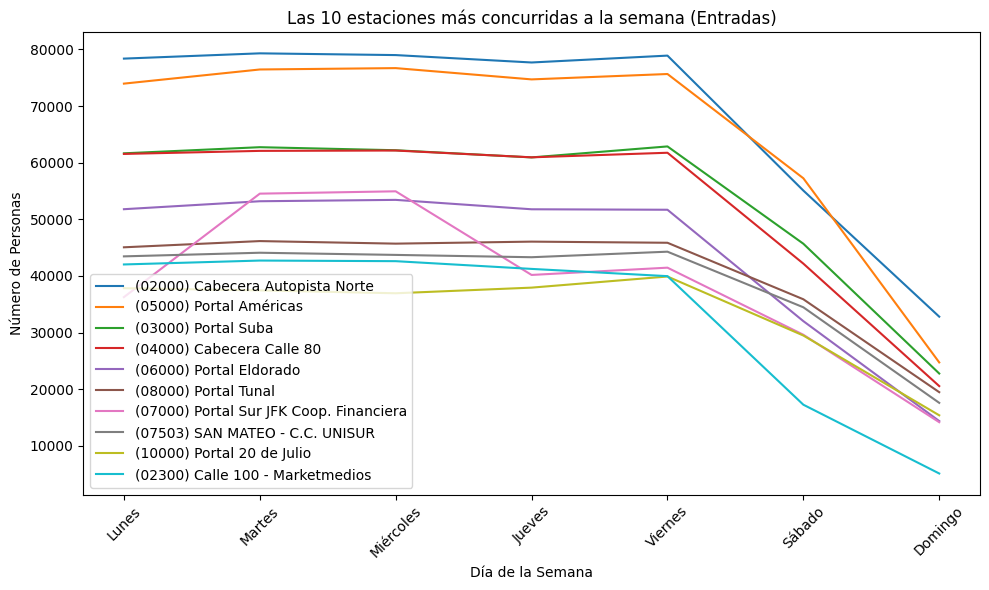

In [ ]:
#import matplotlib.pyplot as plt

# Días de la semana y los índices correspondientes para cada día
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
indices_dias = [[4, 11, 18], [5, 12, 19], [6, 13, 20], [0, 7, 14, 21], [1, 8, 15, 22], [2, 9, 16, 23], [3, 10, 17, 24]]

promedio_ingresos_por_estacion = {}
promedio_ingresos_por_estacion_dia_semana = {}

for estacion in entradas:
    # Inicializar las listas vacías para cada día de la semana
    promedio_ingresos_por_estacion_dia_semana[estacion] = {dia: [] for dia in dias_semana}
    promedio_total_estacion = 0
    for indice_dia, dia in zip(indices_dias, dias_semana):
        promedio = sum(entradas[estacion][indice] for indice in indice_dia) / len(indice_dia)
        promedio_ingresos_por_estacion_dia_semana[estacion][dia].append(promedio)
        promedio_total_estacion += promedio

    promedio_ingresos_por_estacion[estacion] = promedio_total_estacion

estaciones_concurridas_promedio = sorted(entradas.keys(), key=lambda x: promedio_ingresos_por_estacion[x], reverse=True)[:10]



# Graficar el número de personas vs días de la semana para las 10 estaciones más concurridas
fig, ax = plt.subplots(figsize=(10, 6))

for estacion in estaciones_concurridas_promedio:
    promedio_ingresos_semana = [sum(promedio_ingresos_por_estacion_dia_semana[estacion][dia]) for dia in dias_semana]
    ax.plot(dias_semana, promedio_ingresos_semana, label=estacion)

ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Número de Personas')
ax.set_title('Las 10 estaciones más concurridas a la semana (Entradas)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Salidas

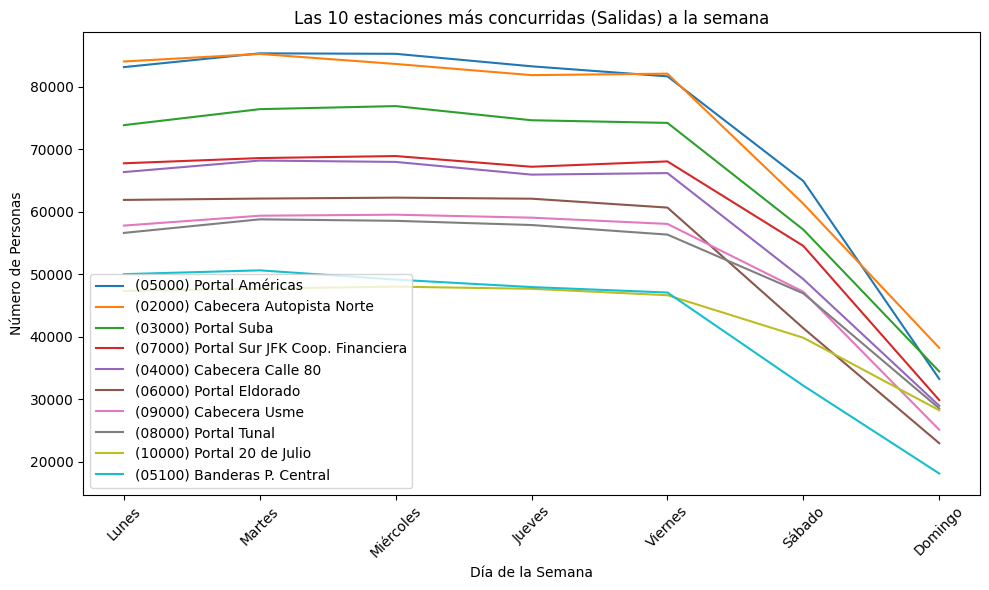

In [ ]:
#import matplotlib.pyplot as plt

# Días de la semana y los índices correspondientes para cada día
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
indices_dias = [[4, 11, 18], [5, 12, 19], [6, 13, 20], [0, 7, 14, 21], [1, 8, 15, 22], [2, 9, 16, 23], [3, 10, 17, 24]]

promedio_salidas_por_estacion = {}
promedio_salidas_por_estacion_dia_semana = {}

for estacion in salidas:
    # Inicializar las listas vacías para cada día de la semana
    promedio_salidas_por_estacion_dia_semana[estacion] = {dia: [] for dia in dias_semana}
    promedio_total_estacion = 0
    for indice_dia, dia in zip(indices_dias, dias_semana):
        promedio = sum(salidas[estacion][indice] for indice in indice_dia) / len(indice_dia)
        promedio_salidas_por_estacion_dia_semana[estacion][dia].append(promedio)
        promedio_total_estacion += promedio

    promedio_salidas_por_estacion[estacion] = promedio_total_estacion

estaciones_concurridas_promedio = sorted(salidas.keys(), key=lambda x: promedio_salidas_por_estacion[x], reverse=True)[:10]



# Graficar el número de personas vs días de la semana para las 10 estaciones más concurridas
fig, ax = plt.subplots(figsize=(10, 6))

for estacion in estaciones_concurridas_promedio:
    promedio_salidas_semana = [sum(promedio_salidas_por_estacion_dia_semana[estacion][dia]) for dia in dias_semana]
    ax.plot(dias_semana, promedio_salidas_semana, label=estacion)

ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Número de Personas')
ax.set_title('Las 10 estaciones más concurridas (Salidas) a la semana')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Entradas-Salidas

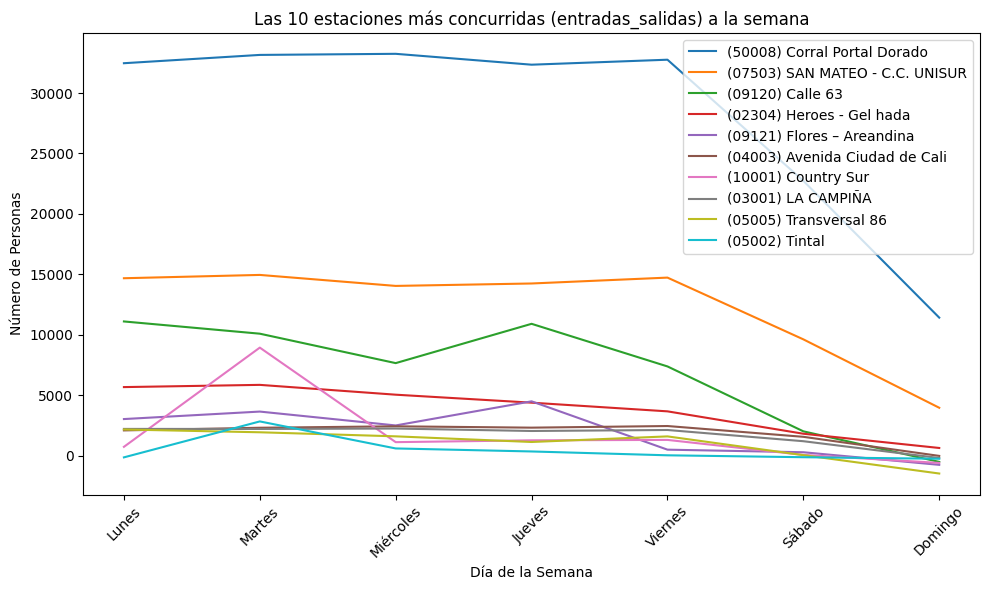

In [ ]:
#import matplotlib.pyplot as plt

# Días de la semana y los índices correspondientes para cada día
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
indices_dias = [[4, 11, 18], [5, 12, 19], [6, 13, 20], [0, 7, 14, 21], [1, 8, 15, 22], [2, 9, 16, 23], [3, 10, 17, 24]]

promedio_entradas_salidas_por_estacion = {}
promedio_entradas_salidas_por_estacion_dia_semana = {}

for estacion in entradas_salidas:
    # Inicializar las listas vacías para cada día de la semana
    promedio_entradas_salidas_por_estacion_dia_semana[estacion] = {dia: [] for dia in dias_semana}
    promedio_total_estacion = 0
    for indice_dia, dia in zip(indices_dias, dias_semana):
        promedio = sum(entradas_salidas[estacion][indice] for indice in indice_dia) / len(indice_dia)
        promedio_entradas_salidas_por_estacion_dia_semana[estacion][dia].append(promedio)
        promedio_total_estacion += promedio

    promedio_entradas_salidas_por_estacion[estacion] = promedio_total_estacion

estaciones_concurridas_promedio = sorted(entradas_salidas.keys(), key=lambda x: promedio_entradas_salidas_por_estacion[x], reverse=True)[:10]



# Graficar el número de personas vs días de la semana para las 10 estaciones más concurridas
fig, ax = plt.subplots(figsize=(10, 6))

for estacion in estaciones_concurridas_promedio:
    promedio_entradas_salidas_semana = [sum(promedio_entradas_salidas_por_estacion_dia_semana[estacion][dia]) for dia in dias_semana]
    ax.plot(dias_semana, promedio_entradas_salidas_semana, label=estacion)

ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Número de Personas')
ax.set_title('Las 10 estaciones más concurridas (entradas_salidas) a la semana')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##La cantidad de personas de salida y entrada para las 10 estaciones más concurridas (Troncal k por 7 dias)

###Cargando los datos

In [ ]:
#estaciones_troncalH = {estacion: G_SemanalK.nodes[estacion]['Label'] for estacion in G_SemanalK.nodes()}

estaciones_troncalH = {'(06000) Portal Eldorado',
'(06001) Modelia',
'(06002) Normandía',
'(06100) Av. Rojas',
'(06101) El Tiempo - Camara de Comercio de Bogota',
'(06102) Salitre El Greco',
'(06103) CAN',
'(06104) Gobernación',
'(06105) Quinta Paredes',
'(06106) Recinto Ferial',
'(06107) Ciudad Universitaria - Loteria de Bogota',
'(06108) Concejo de Bogotá',
'(06109) Centro Memoria',
'(06111) Universidades',
'(50008) Corral Portal Dorado'
}
print(estaciones_troncalH)
print(len(estaciones_troncalH))


entradas_troncalH = {k: v for k, v in entradas.items() if k in estaciones_troncalH}
print(entradas_troncalH)
print(len(entradas_troncalH))

salidas_troncalH = {k: v for k, v in salidas.items() if k in estaciones_troncalH}
print(salidas_troncalH)
print(len(salidas_troncalH))

entradas_salidas_troncalH = {}
for estacion in entradas_troncalH:
    entradas_salidas_troncalH[estacion]= []
    #if estacion == '(06000) Portal Eldorado':
    #print("Estacion ", estacion)
    for i in range(len(entradas[estacion])):
        #print("entradas " ,entradas[estacion][i])
        #print("salidas " ,salidas[estacion][i])
        ingresos_restados = entradas[estacion][i] - salidas[estacion][i]
        #if ingresos_restados >0:
          #print(estacion)
        entradas_salidas_troncalH[estacion].append(ingresos_restados)
        #print("Resultado " ,entradas_salidas[estacion][i])
print(entradas_salidas_troncalH)
print(len(entradas_salidas_troncalH))

{'(06111) Universidades', '(06106) Recinto Ferial', '(06103) CAN', '(06000) Portal Eldorado', '(06109) Centro Memoria', '(06101) El Tiempo - Camara de Comercio de Bogota', '(06105) Quinta Paredes', '(50008) Corral Portal Dorado', '(06104) Gobernación', '(06001) Modelia', '(06108) Concejo de Bogotá', '(06002) Normandía', '(06102) Salitre El Greco', '(06100) Av. Rojas', '(06107) Ciudad Universitaria - Loteria de Bogota'}
15
{'(06000) Portal Eldorado': [53147, 49948, 31295, 14350, 52157, 54190, 53620, 50333, 51475, 31291, 12868, 51354, 51713, 52527, 50580, 52416, 32816, 14977, 51867, 53691, 54171, 53061, 52946, 32714, 15352], '(06001) Modelia': [7958, 7630, 3455, 1056, 7410, 8052, 7650, 8094, 7984, 3135, 1022, 7391, 7554, 7631, 7206, 8830, 4718, 1599, 8637, 8918, 9176, 8905, 8680, 5198, 1622], '(06002) Normandía': [7953, 7921, 4089, 1553, 7884, 8041, 8120, 7670, 8059, 3625, 1603, 7934, 7965, 8353, 8038, 8387, 5018, 2020, 8283, 8575, 8518, 8272, 8393, 4904, 1951], '(06100) Av. Rojas': [899

###Entradas

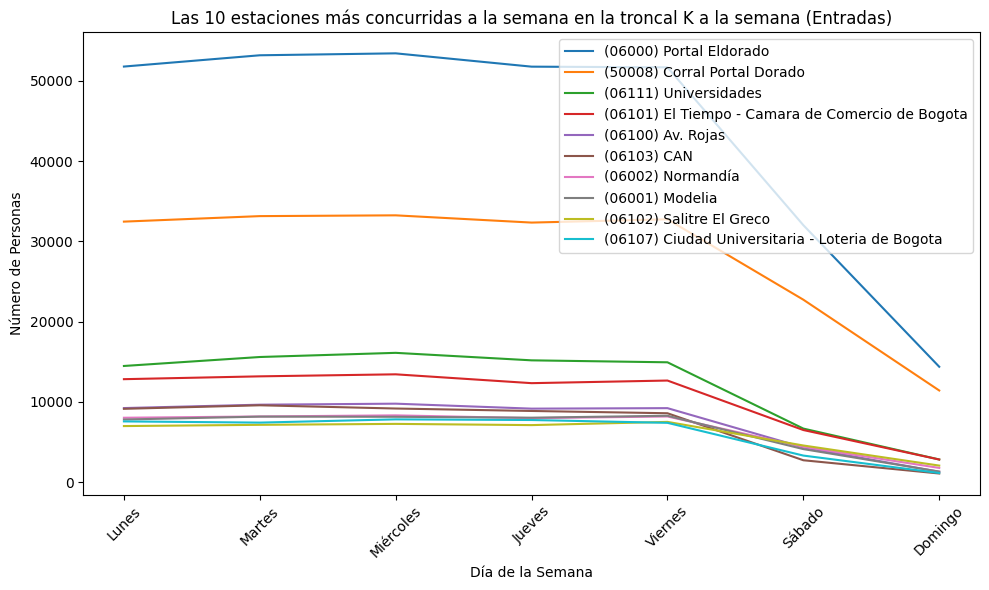

In [ ]:
# Días de la semana y los índices correspondientes para cada día
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
indices_dias = [[4, 11, 18], [5, 12, 19], [6, 13, 20], [0, 7, 14, 21], [1, 8, 15, 22], [2, 9, 16, 23], [3, 10, 17, 24]]

promedio_ingresos_por_estacion = {}
promedio_ingresos_por_estacion_dia_semana = {}

for estacion in entradas_troncalH:
    # Inicializar las listas vacías para cada día de la semana
    promedio_ingresos_por_estacion_dia_semana[estacion] = {dia: [] for dia in dias_semana}
    promedio_total_estacion = 0
    for indice_dia, dia in zip(indices_dias, dias_semana):
        promedio = sum(entradas_troncalH[estacion][indice] for indice in indice_dia) / len(indice_dia)
        promedio_ingresos_por_estacion_dia_semana[estacion][dia].append(promedio)
        promedio_total_estacion += promedio

    promedio_ingresos_por_estacion[estacion] = promedio_total_estacion

estaciones_concurridas_promedio = sorted(entradas_troncalH.keys(), key=lambda x: promedio_ingresos_por_estacion[x], reverse=True)[:10]



# Graficar el número de personas vs días de la semana para las 10 estaciones más concurridas
fig, ax = plt.subplots(figsize=(10, 6))

for estacion in estaciones_concurridas_promedio:
    promedio_ingresos_semana = [sum(promedio_ingresos_por_estacion_dia_semana[estacion][dia]) for dia in dias_semana]
    ax.plot(dias_semana, promedio_ingresos_semana, label=estacion)

ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Número de Personas')
ax.set_title('Las 10 estaciones más concurridas a la semana en la troncal K a la semana (Entradas)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Salidas

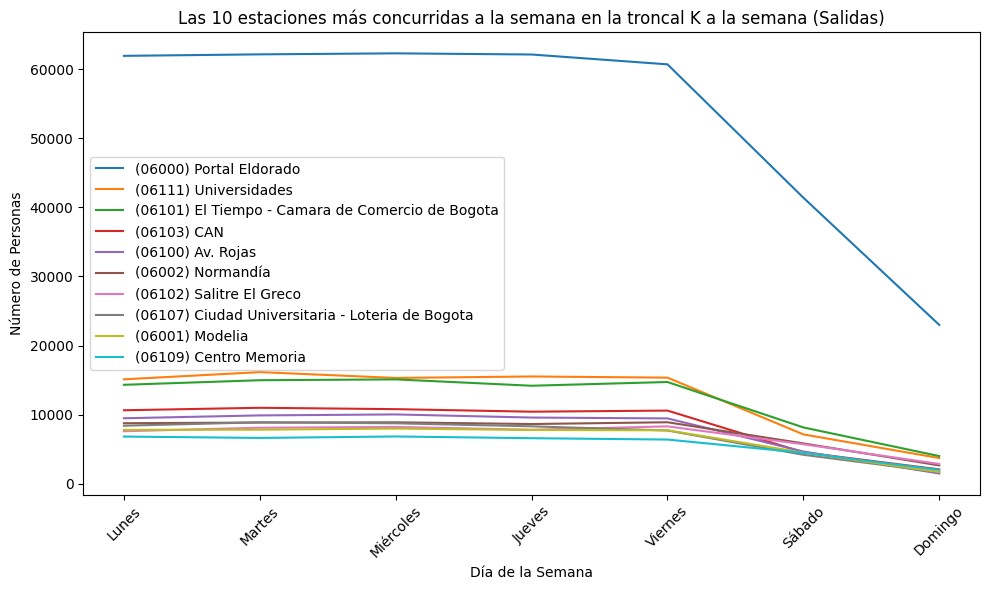

In [ ]:
#import matplotlib.pyplot as plt

# Días de la semana y los índices correspondientes para cada día
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
indices_dias = [[4, 11, 18], [5, 12, 19], [6, 13, 20], [0, 7, 14, 21], [1, 8, 15, 22], [2, 9, 16, 23], [3, 10, 17, 24]]

promedio_salidas_por_estacion = {}
promedio_salidas_por_estacion_dia_semana = {}

for estacion in salidas_troncalH:
    # Inicializar las listas vacías para cada día de la semana
    promedio_salidas_por_estacion_dia_semana[estacion] = {dia: [] for dia in dias_semana}
    promedio_total_estacion = 0
    for indice_dia, dia in zip(indices_dias, dias_semana):
        promedio = sum(salidas_troncalH[estacion][indice] for indice in indice_dia) / len(indice_dia)
        promedio_salidas_por_estacion_dia_semana[estacion][dia].append(promedio)
        promedio_total_estacion += promedio

    promedio_salidas_por_estacion[estacion] = promedio_total_estacion

estaciones_concurridas_promedio = sorted(salidas_troncalH.keys(), key=lambda x: promedio_salidas_por_estacion[x], reverse=True)[:10]



# Graficar el número de personas vs días de la semana para las 10 estaciones más concurridas
fig, ax = plt.subplots(figsize=(10, 6))

for estacion in estaciones_concurridas_promedio:
    promedio_salidas_semana = [sum(promedio_salidas_por_estacion_dia_semana[estacion][dia]) for dia in dias_semana]
    ax.plot(dias_semana, promedio_salidas_semana, label=estacion)

ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Número de Personas')
ax.set_title('Las 10 estaciones más concurridas a la semana en la troncal K a la semana (Salidas)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Entradas-Salidas

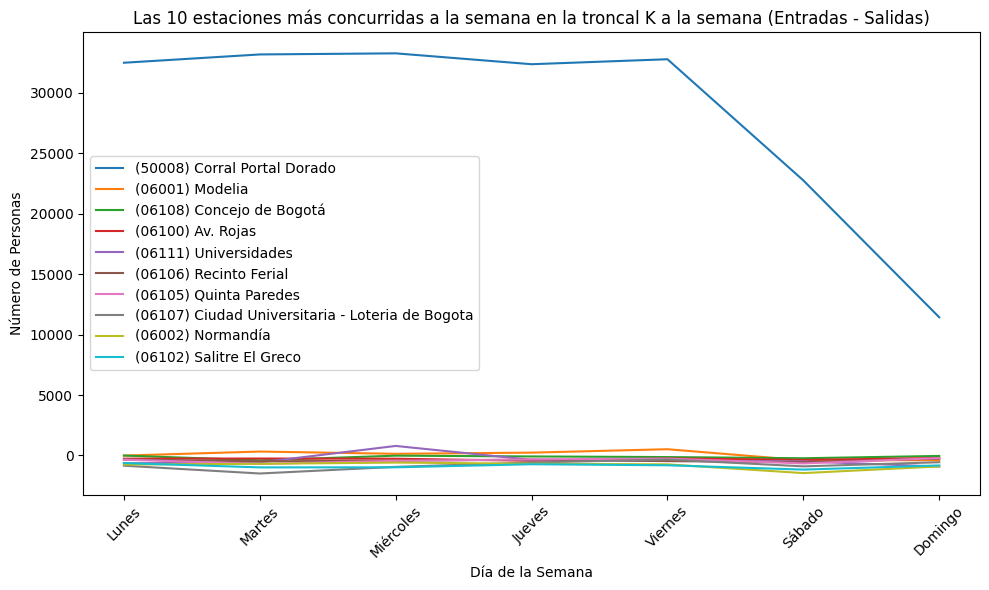

In [ ]:
# Días de la semana y los índices correspondientes para cada día
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
indices_dias = [[4, 11, 18], [5, 12, 19], [6, 13, 20], [0, 7, 14, 21], [1, 8, 15, 22], [2, 9, 16, 23], [3, 10, 17, 24]]

promedio_entradas_salidas_por_estacion = {}
promedio_entradas_salidas_por_estacion_dia_semana = {}

for estacion in entradas_salidas_troncalH:
    # Inicializar las listas vacías para cada día de la semana
    promedio_entradas_salidas_por_estacion_dia_semana[estacion] = {dia: [] for dia in dias_semana}
    promedio_total_estacion = 0
    for indice_dia, dia in zip(indices_dias, dias_semana):
        promedio = sum(entradas_salidas_troncalH[estacion][indice] for indice in indice_dia) / len(indice_dia)
        promedio_entradas_salidas_por_estacion_dia_semana[estacion][dia].append(promedio)
        promedio_total_estacion += promedio

    promedio_entradas_salidas_por_estacion[estacion] = promedio_total_estacion

estaciones_concurridas_promedio = sorted(entradas_salidas_troncalH.keys(), key=lambda x: promedio_entradas_salidas_por_estacion[x], reverse=True)[:10]



# Graficar el número de personas vs días de la semana para las 10 estaciones más concurridas
fig, ax = plt.subplots(figsize=(10, 6))

for estacion in estaciones_concurridas_promedio:
    promedio_entradas_salidas_semana = [sum(promedio_entradas_salidas_por_estacion_dia_semana[estacion][dia]) for dia in dias_semana]
    ax.plot(dias_semana, promedio_entradas_salidas_semana, label=estacion)

ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Número de Personas')
ax.set_title('Las 10 estaciones más concurridas a la semana en la troncal K a la semana (Entradas - Salidas)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()